# Z-test questions

### 🔹 Summary Table

| Test Direction      | Alternate Hypothesis \( H_1 \) | Function for P-value         |
|---------------------|------------------------------|-------------------------------|
| Left-tailed         | $( \mu < \mu_0 )$             | `stats.norm.cdf(z)`          |
| Right-tailed        | $( \mu > \mu_0 )$             | `1 - stats.norm.cdf(z)`      |
| Two-tailed          | $( \mu \ne \mu_0 )$           | `2 * (1 - stats.norm.cdf(abs(z)))` or similar |

### use of abs(zstats) in 2-tailed_test only

| Test Type      | Your Code Correct? | Reason                                     |
|----------------|--------------------|--------------------------------------------|
| One-tailed (left)  | ❌                  | Should use `stats.norm.cdf(z)`             |
| One-tailed (right) | ✅ (but avoid `abs()`) | Better: `1 - stats.norm.cdf(z)` without `abs` |
| Two-tailed         | ✅ if `* 2` is used | Use `2 * (1 - norm.cdf(abs(z)))`            |



In [1]:
import scipy
import numpy as np
from scipy import stats

## 🔹 **[1] One-Tailed Z-Test (Left-Tailed)**

**Q1.** A bank claims that its new fraud detection algorithm flags frauds faster than the previous version, which had a mean detection time of 120 seconds. You collect a sample of 100 transactions and find a sample mean of 115 seconds with a known standard deviation of 30 seconds. Is there evidence that the new system is faster?

- null hypo : flag time is same. i.e $\mu$ >= 120


- alternate : flag time increased $\mu$ < 120

In [2]:
pop_mean = 120
sample_size = 100
sample_mean = 115
population_std = 30

In [3]:
alpha = 0.05

In [4]:
z_stats = (sample_mean - pop_mean)/(population_std /np.sqrt(sample_size))
z_stats

-1.6666666666666667

####  p-value for one-tailed test (left tail)

In [5]:
p_value = stats.norm.cdf(z_stats)
p_value

0.0477903522728147

In [6]:
print(f"Z-score: {z_stats:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"alpha: {alpha:.4f}")

Z-score: -1.6667
P-value: 0.0478
alpha: 0.0500


In [7]:
# Decision
if p_value < alpha:
    print("Reject the null hypothesis. The new system is significantly faster.")
else:
    print("Fail to reject the null hypothesis. Not enough evidence that it's faster.")

Reject the null hypothesis. The new system is significantly faster.


## 🔹 **[2] <span class="mark"> Z-Test for Proportions : One-Tailed Z-Test (Left-Tailed)</span>**

**Q2.** A payment gateway asserts that their transaction failure rate has dropped below 2%. In a recent sample of 5000 transactions, 80 failed. Can you verify the claim?

### 🔸 Step 1: Define the Hypotheses

We’re testing if the **true failure rate is less than 2%** → so this is a **left-tailed test** for proportions.

Let:

- $p_0 = 0.02$ (claimed failure rate)


- $\hat{p} = \frac{80}{5000} = 0.016$ (observed failure rate)

**Hypotheses:**



- **Null Hypothesis (H₀):** $p = 0.02$  



- **Alternative Hypothesis (H₁):** $p < 0.02$ (failure rate has dropped → better performance)

### 🔸 Step 2: Z-Test for Proportions

Formula for z-test for a proportion:

$$
z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}}
$$

Where:

- $\hat{p} = \frac{80}{5000} = 0.016$
- $p_0 = 0.02$
- $n = 5000$

Let’s compute this in Python:

In [8]:
80/5000

0.016

In [9]:
from scipy import stats
import math

# Given values
p_hat = 80 / 5000
p_0 = 0.02
n = 5000

# Z-statistic
z = (p_hat - p_0) / math.sqrt(p_0 * (1 - p_0) / n)

# Left-tailed test → area to the left
p_value = stats.norm.cdf(z)

print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")


Z-statistic: -2.0203
P-value: 0.0217


```
Z-statistic: -2.0203
P-value: 0.0217
```

---

### 🔸 Step 4: Conclusion

Since **p-value (0.0217) < α (0.05)** → we **reject the null hypothesis**.

---

### ✅ Final Answer:

> There is **enough statistical evidence** at the 5% level to conclude that the transaction failure rate has **dropped below 2%**. The company’s claim **is true** with this sample.

## 🔹 **[3] One-Tailed Z-Test (Left-Tailed)**

**Q3.** A fintech firm claims that its customer onboarding time is less than the industry average of 15 minutes. You gather onboarding time for 64 new customers. Mean time = 14.2 mins, known std dev = 3 mins. Is the claim valid?

Let μ be the population mean onboarding time.

- Null Hypothesis (H₀): μ = 15 (onboarding time is not less than industry average)



- Alternate Hypothesis (H₁): μ < 15 (onboarding time is less)

In [10]:
pop_mean = 15
sample_size = 64
sample_mean = 14.2
population_std = 3

In [11]:
alpha = 0.05

In [12]:
z_stats = (sample_mean - pop_mean)/(population_std/(np.sqrt(sample_size)))
z_stats

-2.133333333333335

In [13]:
p_value = stats.norm.cdf(z_stats)
p_value

0.016448695822745253

In [14]:
print(f"Z-score: {z_stats:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"alpha: {alpha:.4f}")

Z-score: -2.1333
P-value: 0.0164
alpha: 0.0500


In [15]:
# Decision
if p_value < alpha:
    print("Reject the null hypothesis. so,onboarding time is less.")
else:
    print("Fail to reject the null hypothesis. Not enough evidence that onboarding time is less than industry average.")

Reject the null hypothesis. so,onboarding time is less.


At the 5% significance level, there is enough statistical evidence to support the claim that the fintech firm’s customer onboarding time is significantly less than the industry average of 15 minutes.

## 🔹 **[4] <span class="girk">One-Tailed Z-Test (Left-Tailed)</span>**

**Q4.** An e-commerce company wants to prove that their app crashes less than 3% of the time. From 10,000 sessions, 280 crashes were reported. Can they support their claim?

In [16]:
280/10000

0.028

We’re testing if the true crash rate is less than 3% → so this is a left-tailed test for proportions.

Let:

- $p_0 = 0.03$ (claimed failure rate)
- $\hat{p} = \frac{280}{10000} = 0.028$ (observed failure rate)

**Hypotheses:**

- **Null Hypothesis (H₀):** $p = 0.03$  


- **Alternative Hypothesis (H₁):** $p < 0.03$ (crash rate has dropped → better performance)


Formula for z-test for a proportion:

$$
z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}}
$$

Where:

- $\hat{p} = \frac{280}{10000} = 0.028$
- $p_0 = 0.03$
- $n = 10000$

In [17]:
p_hat = 280/10000
p_o = 0.03
n = 10000

In [18]:
alpha = 0.05

In [19]:
z_stats = (p_hat - p_o)/np.sqrt((p_o * (1 - p_o))/n)
z_stats

-1.1724207635210975

In [20]:
p_value = stats.norm.cdf(z_stats)
p_value

0.12051408363221616

In [21]:
print(f"Z-statistic: {z_stats:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"alpha: {alpha:.4f}")

Z-statistic: -1.1724
P-value: 0.1205
alpha: 0.0500


### 🔸 Conclusion
Since **p-value (0.1205) > α (0.05)** → we **fail to reject the null hypothesis**.

At the 5% significance level, there is not enough statistical evidence to support the e-commerce company’s claim that the app crashes less than 3% of the time.

## 🔹 **[5] One-Tailed Z-Test (Right-Tailed)**

**Q5.** A trading algorithm has a historical win rate of 55%. A recent 200 trades show a win rate of 60%. Is this increase statistically significant?

We are testing if the new win rate is greater than the historical average, so this is a right-tailed test.


**Hypotheses:**

- **Null Hypothesis (H₀):** $p = 0.55$  


- **Alternative Hypothesis (H₁):** $p > 0.55$ 


Formula for z-test for a proportion:

$$
z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}}
$$

Where:

- $\hat{p} = 0.60$
- $p_0 = 0.55$
- $n = 200$

In [22]:
p_hat = 0.60
p_o = 0.55
n = 200

In [23]:
alpha = 0.05

In [24]:
z_stats = (p_hat - p_o)/np.sqrt((p_o * (1 - p_o))/n)
z_stats

1.4213381090374009

In [25]:
p_value = 1 - stats.norm.cdf(z_stats)
p_value

0.07760924484234233

In [26]:
print(f"Z-statistic: {z_stats:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"alpha: {alpha:.4f}")

Z-statistic: 1.4213
P-value: 0.0776
alpha: 0.0500


### 🔸 Conclusion
Since **p-value (0.0776) > α (0.05)** → we **fail to reject the null hypothesis**.

Since the p-value > 0.05, we fail to reject the null hypothesis.
There is not enough statistical evidence to conclude that the trading algorithm’s win rate has significantly improved from 55% to 60%.

## 🔹 **[6] Two-Tailed Z-Test**

**Q6.** A lending firm believes the average interest rate offered is **different** from the national average of 7.5%. You sample 50 loans with a sample mean of 7.9% and known population std dev of 1.2%. Can you verify this claim?

We are checking if the interest rate is different (could be higher or lower), so it's a two-tailed z-test.

Let 

μ be the true mean interest rate of the lending firm.

**Hypotheses:**

Null Hypothesis (H₀):  $\mu = 7.5$
 
Alternative Hypothesis (H₁):  $\mu \neq$ 7.5

In [27]:
pop_mean = 7.5
sample_size = 50
sample_mean = 7.9
population_std = 1.2

In [28]:
alpah = 0.05

In [29]:
z_stats = (sample_mean - pop_mean)/(population_std/np.sqrt(sample_size))
z_stats

2.3570226039551607

In [30]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
p_value

0.018422125454098826

In [31]:
print(f"Z-statistic: {z_stats:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"alpha: {alpha:.4f}")

Z-statistic: 2.3570
P-value: 0.0184
alpha: 0.0500


In [32]:
# Compare p-value with alpha
if p_value < alpha:
    print("✅ Reject the null hypothesis — the firm's average interest rate is significantly different.")
else:
    print("❌ Fail to reject the null hypothesis — not enough evidence to say it's different.")

✅ Reject the null hypothesis — the firm's average interest rate is significantly different.


Since p-value = 0.0184 < α = 0.05, we reject the null hypothesis.

There is enough statistical evidence to support the claim that the firm’s average interest rate is significantly different from the national average of 7.5%.

## 🔹 **[7] Two-Tailed Z-Test**

**Q7.** You suspect the mean transaction amount on a website has changed from last year’s average of \$85. 

Sample size = 150, sample mean = \\$87.5, population std dev = \\$10. Test this claim.

Since we're testing if the mean has changed, we use a two-tailed test.

Let 

μ be the true mean transaction amount.


Hypotheses:

Null Hypothesis (H₀):  𝜇= 85
 

Alternative Hypothesis (H₁):  𝜇≠ 85

In [33]:
pop_mean = 85
sample_size = 150
sample_mean = 87.5
population_std = 10

In [34]:
alpha = 0.05

In [35]:
z_stats = (sample_mean - pop_mean)/(population_std/sample_size)
z_stats

37.5

In [36]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
p_value

0.0

In [37]:
# Print the results
print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Alpha: {alpha}")

Z-statistic: -2.0203
P-value: 0.0000
Alpha: 0.05


In [38]:
# Decision rule
if p_value < alpha:
    print("✅ Reject the null hypothesis — transaction mean has significantly changed.")
else:
    print("❌ Fail to reject the null hypothesis — not enough evidence of change.")

✅ Reject the null hypothesis — transaction mean has significantly changed.


Since p-value = 0.000 < α = 0.05, we reject the null hypothesis.

There is significant evidence to suggest that the mean transaction amount has changed from last year’s average of $85.

## 🔹 **[8] Two-Tailed Z-Test**

**Q8.** A customer support manager believes the average resolution time has changed from the usual 30 minutes. Sample mean = 32 mins, population std dev = 8, n = 60. Can you test this hypothesis?

This is a two-tailed test because the manager suspects the average has changed (could be higher or lower).

Let 
𝜇
μ be the true average resolution time.

Hypotheses:

Null Hypothesis (H₀): 𝜇= 30

Alternative Hypothesis (H₁): 𝜇≠ 30

In [39]:
pop_mean = 30
sample_size = 60
sample_mean = 32
population_std = 8

In [40]:
alpha = 0.05

In [41]:
z_stats = (sample_mean - pop_mean)/(population_std/(np.sqrt(sample_size)))
z_stats

1.9364916731037087

In [42]:
p_value = 2 * (1-stats.norm.cdf(abs(z_stats)))
p_value

0.052807511416113506

In [43]:
# Print the results
print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Alpha: {alpha}")

Z-statistic: -2.0203
P-value: 0.0528
Alpha: 0.05


In [44]:
# Decision based on alpha
if p_value < alpha:
    print("✅ Reject the null hypothesis — average resolution time has significantly changed.")
else:
    print("❌ Fail to reject the null hypothesis — not enough evidence of change.")

❌ Fail to reject the null hypothesis — not enough evidence of change.


Since p-value = 0.0528 > α = 0.05, we fail to reject the null hypothesis.

There is not enough statistical evidence to say the average resolution time has changed from 30 minutes.

## 🔹 **[9] Two-Tailed Z-Test**

**Q9.** A SaaS platform’s average number of daily users was 5,000 last quarter. You collect a random sample from this quarter: sample mean = 5,100, known std dev = 300, n = 90. Has the average usage changed?

Let 

μ be the current average number of users.

Null Hypothesis (H₀):  μ=5000

Alternative Hypothesis (H₁):  μ ≠ 5000 (average usage has changed)

This is a two-tailed z-test because we are checking for any change (not just an increase or decrease).

In [45]:
pop_mean = 5000
sample_size = 90
sample_mean = 5100
population_std = 300

In [46]:
alpha = 0.05

In [47]:
z_stats = (sample_mean - pop_mean)/(population_std/(np.sqrt(sample_size)))
z_stats

3.1622776601683795

In [48]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
p_value

0.0015654022580025018

In [49]:
# Print the results
print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Alpha: {alpha}")

Z-statistic: -2.0203
P-value: 0.0016
Alpha: 0.05


In [50]:

# Decision
if p_value < alpha:
    print("✅ Reject the null hypothesis — average usage has significantly changed.")
else:
    print("❌ Fail to reject the null hypothesis — no significant change in usage.")

✅ Reject the null hypothesis — average usage has significantly changed.


Since p-value (0.0016) < α (0.05), we reject the null hypothesis.

There is statistical evidence that the average number of daily users has changed this quarter.

## 🔹 **[10] Two-Tailed Z-Test**

**Q10.** An online food delivery service had an average delivery time of 40 minutes. You take a sample of 120 recent deliveries, mean = 41.2, std dev = 5 mins. Has the delivery time changed?



Let 
𝜇
μ be the true average delivery time now.

Null Hypothesis (H₀):  μ=40 (No change in average delivery time)

Alternative Hypothesis (H₁):  𝜇 ≠ 40 (Delivery time has changed)

This is a two-tailed test because we’re checking for any change, not just an increase or decrease.

In [51]:
pop_mean = 40
sample_size = 120
sample_mean = 41.2
population_std = 5

In [52]:
z_stats = (sample_mean - pop_mean)/(population_std/(np.sqrt(n)))
z_stats

3.3941125496954365

In [53]:
p_value = 2* (1 - stats.norm.cdf(abs(z_stats)))
p_value

0.0006885138966450377

In [54]:
# Print the results
print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Alpha: {alpha}")

Z-statistic: -2.0203
P-value: 0.0007
Alpha: 0.05


In [55]:
# Decision rule
if p_value < alpha:
    print("✅ Reject the null hypothesis — the delivery time has significantly changed.")
else:
    print("❌ Fail to reject the null hypothesis — no significant change in delivery time.")

✅ Reject the null hypothesis — the delivery time has significantly changed.


There is statistical evidence that the average delivery time has changed from the previous average of 40 minutes.

### 🔹 **[11] Two-Sample Independent Z-Test**

**Q11.** Compare average salaries between Data Scientists in two different cities. City A: mean = \\$130k, std dev = \\$15k, n = 50. City B: mean = \\$125k, std dev = \\$14k, n = 50. Are the means significantly different?

**Scenario:**  
Compare average salaries of Data Scientists in two cities:

- **City A**  
  - Mean = \\$130k  
  - Standard deviation = \\$15k  
  - Sample size = 50  

- **City B**  
  - Mean = \\$125k  
  - Standard deviation = \\$14k  
  - Sample size = 50  

---

### 🔍 Step 1: Hypotheses

Let $\mu_1$ = mean salary in City A  


Let $\mu_2$ = mean salary in City B



- **Null Hypothesis (H₀):** $\mu_1 = \mu_2$  
  (No difference in average salary between the two cities)


- **Alternate Hypothesis (H₁):** $\mu_1 \ne \mu_2$  
  (There **is** a significant difference)

> Since we are checking for **any** difference, this is a **two-tailed z-test**.

---

#### 🧠 Step 2: Z-Test Formula

$$
Z = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}
$$

In [56]:
sample_mean1 = 130
sample_std1 = 15
sample_mean2 = 125
sample_std2 = 14
sample_size1 = 50
sample_size2 = 50

In [57]:
alpha = 0.05

In [58]:
z_stats = (sample_mean1 - sample_mean2)/(np.sqrt((sample_std1**2/sample_size1) + (sample_std2**2/sample_size2)))
z_stats

1.723113791988944

In [59]:
# Two-tailed p-value
p_value = 2 * (1-stats.norm.cdf(abs(z_stats)))
p_value

0.08486794918330598

In [60]:
# Output
print(f"Z-statistic: {z:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"alpha: {alpha:.4f}")

Z-statistic: -2.0203
p-value: 0.0849
alpha: 0.0500


In [61]:
# Decision
if p_value < alpha:
    print("✅ Reject the null hypothesis — there is a significant difference in salaries.")
else:
    print("❌ Fail to reject the null hypothesis — no significant difference in salaries.")

❌ Fail to reject the null hypothesis — no significant difference in salaries.


There is **no statistically significant difference** in average salaries between Data Scientists in City A and City B, based on the sample data.


## 🔹 **[12] <span class="mark">Z-test for two Proportions : Two-Sample Independent Z-Test</span>**

**Q12.** You are comparing credit card default rates between two banks. Bank A: 100 defaults out of 4000, Bank B: 140 out of 4200. Is there a significant difference?

$$z = \frac{(\hat{p}_1 - \hat{p}_2)}{\sqrt{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}$$

* Where:
    * $\hat{p}_1$ and $\hat{p}_2$ = sample proportions
    * $n_1$ and $n_2$ = sample sizes
    * $p = \frac{x 1 +x 2}{n_1 + n_2}$ (pooled proportion)

- **Bank A**: 100 defaults out of 4000 → $\hat{p}_1 = \frac{100}{4000}$


- **Bank B**: 140 defaults out of 4200 → $\hat{p}_2 = \frac{140}{4200}$


- **Goal**: Test if there's a significant difference between the two banks' default rates.

### 📊 Hypotheses

- **Null Hypothesis (H₀)**:  
  $p_1 = p_2$  
  → The default rates of both banks are the same.



- **Alternate Hypothesis (H₁)**:  
  $p_1 \ne p_2$  
  → The default rates of the two banks are different.

This is a **two-tailed z-test for proportions**.

In [62]:
import numpy as np
from scipy import stats

In [63]:
# Bank A
x1 = 100  # defaults
n1 = 4000  # total

# Bank B
x2 = 140
n2 = 4200

# sample proportions : 
p1_hat = 100/4000
p2_hat = 140/4200

n1 = 4000
n2 = 4200



In [64]:
# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)
p_pool

0.02926829268292683

In [65]:
# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
se

0.0037239221016040778

In [66]:
# Z-statistic
z_stats = (p1_hat - p2_hat) / se
z_stats

-2.237784009967274

In [67]:
# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
p_value

0.04335175126086255

In [68]:
# Significance level
alpha = 0.05

In [69]:
# Output
print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Alpha: {alpha:.4f}")

Z-statistic: -2.0203
P-value: 0.0434
Alpha: 0.0500


In [70]:
# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between default rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference between default rates.")

Reject the null hypothesis: There is a significant difference between default rates.


There is a statistically significant difference in the default rates between the two banks.

## 🔹 **[13] <span class="girk">Two-Sample Independent Z-Test</span>**

**Q13.** A/B testing: Group A conversion rate = 6.1% (n=10,000), Group B = 6.6% (n=10,000). Is the difference statistically significant?

$$z = \frac{(\hat{p}_1 - \hat{p}_2)}{\sqrt{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}}$$

Where:
- $\hat p_1 = \frac{x_1}{n_1}$, $\hat p_2 = \frac{x_2}{n_2}$


- pooled $(p) = \frac{x_1 + x_2}{n_1 + n_2}$

You are running an A/B test:

- **Group A:**  
  
  - Conversion rate = 6.1%  
  
  
  - Sample size = 10,000  

- **Group B:**  
  
  
  - Conversion rate = 6.6%  
  
  
  - Sample size = 10,000  




### 📑 **Step 1: Hypotheses**

This is a **two-tailed test**.


- **Null Hypothesis (H₀):**  
  $p_1 = p_2$  → No difference in conversion rates.



- **Alternative Hypothesis (H₁):**  
  $p_1 \ne p_2$  → There is a difference in conversion rates.

In [71]:
n1 = n2 = 10000
p1_hat = 0.061
p2_hat = 0.066

In [72]:
x1 = p1_hat * n1
x2 = p2_hat * n2

x1, x2

(610.0, 660.0)

In [73]:
pooled = (x1+x2)/(n1+n2)
pooled

0.0635

In [74]:
# Standard error
se = np.sqrt( pooled * (1 - pooled) * (1/n1 + 1/n2 ) )
se

0.0034487026546224596

In [75]:
z_stats = (p1_hat - p2_hat)/se
z_stats

-1.4498205559410196

In [76]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
p_value

0.14710856570321806

In [77]:

# Display results
print(f"x1 = {x1}, x2 = {x2}")
print(f"p1 = {p1_hat}, p2 = {p2_hat}")
print(f"pooled p = {pooled:.4f}")
print(f"standard error = {se:.6f}")
print()
print(f"alpha :{alpha}")
print(f"z-statistic = {z_stats:.4f}")
print(f"p-value = {p_value:.4f}")

x1 = 610.0, x2 = 660.0
p1 = 0.061, p2 = 0.066
pooled p = 0.0635
standard error = 0.003449

alpha :0.05
z-statistic = -1.4498
p-value = 0.1471


In [78]:
# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between conversion rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference between conversion rates.")

Fail to reject the null hypothesis: No significant difference between conversion rates.


Here:
- **p-value = 0.1471 > 0.05**

🔍 **Conclusion**:  


We **fail to reject** the null hypothesis.  


👉 The observed difference in conversion rates **is not statistically significant**.



## 🔹 **[14] Two-Sample Independent Z-Test**

**Q14.** Two mobile apps report battery usage. App X: mean = 4.2 hrs, std dev = 0.8, n = 60. App Y: mean = 4.5 hrs, std dev = 0.6, n = 60. Is there a significant difference?

$$Z-statistics=\frac{(\bar x_1 - \bar x_2 )}{\sqrt{\frac{(\sigma_1^2)}{n_1}+\frac{(\sigma_2^2)}{n_2}}}$$

Where:
- Z is the test statistic.
- x̄1 and x̄2 are the sample means of the two samples.
- σ1 and σ2 are the population standard deviations of the two samples.
- n1 and n2 are the sample sizes of the two samples.

### 📑 **Step 1: Hypotheses**

This is a **two-tailed test**.

- **Null Hypothesis (H₀):**  
  $\mu_1 = \mu_2$  → No difference in average battery usage.


- **Alternative Hypothesis (H₁):**  
  $\mu_1 \ne \mu_2$  → There is a significant difference in average battery usage.

In [79]:

x1_mean = 4.2
x2_mean = 4.5

std1 = 0.8
std2 = 0.6


n1 = 60
n2 = 60

In [80]:
alpha = 0.05

In [81]:
se = np.sqrt((std1**2/n1) + (std2**2/n2))
se

0.12909944487358058

In [82]:
z_stats = (x1_mean - x2_mean)/se
z_stats

-2.3237900077244484

In [83]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
p_value

0.020136751550346332

In [84]:
# Output
print(f"alpha : {alpha}")
print(f"Standard Error = {se:.4f}")
print(f"Z-statistic = {z:.4f}")
print(f"P-value = {p_value:.4f}")

alpha : 0.05
Standard Error = 0.1291
Z-statistic = -2.0203
P-value = 0.0201


In [85]:
# Decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: There is a significant difference.


📌 **Conclusion:**  


We **reject the null hypothesis**.  


There **is a statistically significant difference** in battery usage between App X and App Y.

## 🔹 **[15] Two-Sample Independent Z-Test**

**Q15.** Two insurance companies have mean claim processing times of 22 days and 24 days respectively. Standard deviations are 4.5 and 5.0. Sample sizes are 100 and 120. Are the processing times significantly different?

$$Z-statistics=\frac{(\bar x_1 - \bar x_2 )}{\sqrt{\frac{(\sigma_1^2)}{n_1}+\frac{(\sigma_2^2)}{n_2}}}$$

Where:
- Z is the test statistic.
- x̄1 and x̄2 are the sample means of the two samples.
- σ1 and σ2 are the population standard deviations of the two samples.
- n1 and n2 are the sample sizes of the two samples.

### 📑 **Step 1: Hypotheses**

This is a **two-tailed Z-test**.

- **Null Hypothesis (H₀):**  
  $\mu_1 = \mu_2$  → No difference in mean processing times.

- **Alternate Hypothesis (H₁):**  
  $\mu_1 \ne \mu_2$  → There is a significant difference in mean processing times.

In [86]:
x1_mean = 22
x2_mean = 24

std1 = 4.5
std2 = 5.0


n1 = 100
n2 = 120

In [87]:
alpha = 0.05

In [88]:
se = np.sqrt((std1**2/n1) + (std2**2/n2))

In [89]:
z_stats = (x1_mean - x2_mean)/se
z_stats

-3.1203058049540626

In [90]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
p_value

0.001806633766843646

In [91]:
# Output
print(f"alpha : {alpha}")
print(f"Standard Error = {se:.4f}")
print(f"Z-statistic = {z:.4f}")
print(f"P-value = {p_value:.4f}")

alpha : 0.05
Standard Error = 0.6410
Z-statistic = -2.0203
P-value = 0.0018


In [92]:
# Decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant time difference.")
else:
    print("Fail to reject the null hypothesis: No significant time difference.")

Reject the null hypothesis: There is a significant time difference.


✅ **Conclusion:**  

We **reject the null hypothesis**.  


There **is a statistically significant difference** in claim processing times between the two insurance companies.



## 🔹 <span class="girk">[16] Two-Sample Paired (Dependent) (One tailed - right tailed) Z-Test</span> 

**Q16.** A company tests the effectiveness of a training program by measuring employee performance scores before and after the training. Is there a significant improvement?

In [93]:
# Let's simulate performance scores before and after training for 30 employees.


import numpy as np
from scipy.stats import norm

# Simulate paired scores (30 employees)
np.random.seed(42)
before = [70, 65, 80, 72, 68, 74, 77, 69, 71, 73]
after  = [75, 70, 85, 76, 74, 78, 80, 72, 74, 76]


### 📑 **Step 1: Hypotheses**

This is a **one-tailed paired Z-test** (right-tailed if we expect improvement):

- **Null Hypothesis (H₀):**  
  $\mu_d = 0$  → There is **no improvement** in performance (mean difference = 0)


- **Alternative Hypothesis (H₁):**  
  $\mu_d > 0$  → There **is an improvement** in performance (mean difference > 0)

### 🧠 **Step 2: Z-Test Formula for Paired Samples**

We apply the Z-test on the **differences** (after - before):

$$Z-statistics = \frac{(\bar x_d - \mu_d)} {(\sigma_d/\sqrt n)}$$

Where:
- Z is the test statistic.
- x̄d is the mean of the paired differences.
- μd is the hypothesized population mean of the paired differences.
- σd is the population standard deviation of the paired differences.
- n is the number of paired data points.

**- μd (pop_mean_paired_diff) is the hypothesized population mean of the paired differences which is 0 here**

In [94]:
# Step 1: Differences
differences = np.subtract(after, before)
differences

array([5, 5, 5, 4, 6, 4, 3, 3, 3, 3])

- x̄_d -> mean_paired_diff

- s_d -> std

- μ_d -> pop_mean_paired_diff

In [95]:
# Step 2: Sample statistics

mean_paired_diff = np.mean(differences)       # Mean of differences

std = np.std(differences, ddof=1) # Sample standard deviation

n = len(differences)              # Number of pairs

pop_mean_paired_diff = 0  

In [96]:
se = std/np.sqrt(n)
se

0.348010216963685

In [97]:
z_stats = (mean_paired_diff - pop_mean_paired_diff)/se
z_stats

11.781263308220161

In [98]:
# Step 4: p-value (right-tailed)
p_value = 1 - stats.norm.cdf(z_stats)
p_value

0.0

In [99]:
# Step 5: Decision at α = 0.05
alpha = 0.05

In [100]:
# Output results
print(f"Mean Difference = {mean_paired_diff:.4f}")
print(f"Std Dev of Differences = {std:.4f}")
print(f"Z-statistic = {z_stats:.4f}")
print(f"P-value = {p_value:.4f}")

Mean Difference = 4.1000
Std Dev of Differences = 1.1005
Z-statistic = 11.7813
P-value = 0.0000


In [101]:
# Decision
if p_value < alpha:
    print("✅ Reject the null hypothesis: There is a significant improvement.")
else:
    print("❌ Fail to reject the null hypothesis: No significant improvement.")

✅ Reject the null hypothesis: There is a significant improvement.


## 🔹 [17] <span class="girk">Two-Sample Paired Dependent Z-Test (2 tailed)</span>

**Q17.** Test user engagement before and after a UI redesign. Engagement scores (e.g., time on app) for 30 users were recorded before and after the redesign. Is the mean difference significant?

> 📍 Goal: Test if the **mean difference is significant**.


### ✅ **Hypotheses**

This is a **two-tailed paired Z-test**.

- **Null Hypothesis (H₀):** No change in engagement → $\mu_d = 0$


- **Alternate Hypothesis (H₁):** There is a change → $\mu_d \neq 0$

### 🧠 **Step 2: Z-Test Formula for Paired Samples**

We apply the Z-test on the **differences** (after - before):

$$Z-statistics = \frac{(\bar x_d - \mu_d)} {(\sigma_d/\sqrt n)}$$

Where:
- Z is the test statistic.
- x̄d is the mean of the paired differences.
- μd is the hypothesized population mean of the paired differences.
- σd is the population standard deviation of the paired differences.
- n is the number of paired data points.

In [102]:
import numpy as np
from scipy.stats import norm

# Simulated engagement scores for 30 users
np.random.seed(42)
before = np.random.normal(loc=60, scale=10, size=30)
after = before + np.random.normal(loc=3, scale=5, size=30)  # Small improvement

In [103]:
difference = np.subtract(after, before)
difference

array([-8.53306115e-03,  1.22613909e+01,  2.93251388e+00, -2.28855464e+00,
        7.11272456e+00, -3.10421825e+00,  4.04431798e+00, -6.79835062e+00,
       -3.64093024e+00,  3.98430618e+00,  6.69233290e+00,  3.85684141e+00,
        2.42175859e+00,  1.49448152e+00, -4.39260995e+00, -5.99221042e-01,
        6.96806145e-01,  8.28561113e+00,  4.71809145e+00, -5.81520078e+00,
        4.62041985e+00,  1.07458860e+00, -3.84610002e-01,  6.05838144e+00,
        8.15499761e+00,  7.65640060e+00, -1.19608762e+00,  1.45393812e+00,
        4.65631716e+00,  7.87772564e+00])

- x̄_d -> mean_paired_diff

- s_d -> std

- μ_d -> pop_mean_paired_diff


In [104]:
# Step 2: Stats
mean_paired_diff = np.mean(differences)         # Mean of differences
std = np.std(differences, ddof=1)   # Sample standard deviation
n = len(differences)                # Number of users
pop_mean_paired_diff = 0           

differences is the array of differences between paired values (e.g., after - before).

`ddof=1` **means "Delta Degrees of Freedom = 1", which makes it compute the sample standard deviation instead of the population standard deviation.**



If you used `ddof=0:`
**That would calculate the population standard deviation, assuming you have data for the entire population — which is not true here (we only have a sample of users)**.

In [105]:
mean_paired_diff

4.1

In [106]:
se = std/np.sqrt(n)
se

0.348010216963685

In [107]:
z_stats = (mean_paired_diff - pop_mean_paired_diff)/se
z_stats

11.781263308220161

In [108]:
# Step 4: Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
p_value

0.0

In [109]:
# Step 5: Decision
alpha = 0.05

In [110]:
# Decision
if p_value < alpha:
    print("✅ Reject the null hypothesis: There is a significant difference.")
else:
    print("❌ Fail to reject the null hypothesis: No significant diference.")

✅ Reject the null hypothesis: There is a significant difference.


In [111]:
# Results
{
    "mean_paired_difference (x̄_d)": round(mean_paired_diff, 3),
    "sample_std_dev (std)": round(std, 3),
    "sample_size (n)": n,
    "z_statistic": round(z_stats, 3),
    "p_value": round(p_value, 4),
    "alpha": alpha,
}

{'mean_paired_difference (x̄_d)': 4.1,
 'sample_std_dev (std)': 1.101,
 'sample_size (n)': 10,
 'z_statistic': 11.781,
 'p_value': 0.0,
 'alpha': 0.05}

### ✅ Conclusion

Since **p-value < α (0.0001 < 0.05)**, we **reject the null hypothesis**.

➡️ There is statistically significant evidence that **user engagement changed** after the UI redesign.


## 🔹 [18] Two-Sample dependent Paired Z-Test (2-tailed) 

**Q18.** An e-learning company compares test scores of students before and after taking a course. Does the course significantly improve scores?

In [112]:
import pandas as pd
import numpy as np

np.random.seed(42)  # for reproducibility

# Simulated test scores before the course
before_scores = np.random.normal(loc=65, scale=5, size=20)

# Simulated scores after course (slight improvement on average)
after_scores = before_scores + np.random.normal(loc=5, scale=3, size=20)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 🧪 **Hypotheses**:

- **Null Hypothesis (H₀)**: There is **no significant difference** in test scores before and after the course.  
  → H₀: μ<sub>d</sub> = 0  


- **Alternative Hypothesis (H₁)**: There **is a significant difference** in test scores before and after the course.  
  → H₁: μ<sub>d</sub> ≠ 0

(*This is a two-tailed test.*)

### 🧠 **Step 2: Z-Test Formula for Paired Samples**

We apply the Z-test on the **differences** (after - before):

$$Z-statistics = \frac{(\bar x_d - \mu_d)} {(\sigma_d/\sqrt n)}$$

Where:
- Z is the test statistic.
- x̄d is the mean of the paired differences.
- μd is the hypothesized population mean of the paired differences.
- σd is the population standard deviation of the paired differences.
- n is the number of paired data points.

In [113]:
differences = np.subtract(after_scores,before_scores)
differences

array([ 9.39694631,  4.3226711 ,  5.20258461,  0.72575544,  3.36685183,
        5.33276777,  1.54701927,  6.12709406,  3.19808393,  4.12491875,
        3.19488016, 10.55683455,  4.95950833,  1.82686721,  7.46763474,
        1.33746905,  5.62659079, -0.87901037,  1.01544185,  5.59058371])

- x̄_d -> mean_paired_diff

- s_d -> std

- μ_d -> pop_mean_paired_diff

In [114]:
mean_paired_diff = np.mean(differences)  # x̄_d

std = np.std(differences, ddof=1)

pop_mean_paired_diff = 0

n = len(differences)

In [115]:
se = std/np.sqrt(n)

In [116]:
z_stats = (mean_paired_diff - pop_mean_paired_diff)/se
z_stats

6.4709014098957365

In [117]:
p_value = 2 * (1 -  stats.norm.cdf(abs(z_stats)))
p_value

9.742007200941316e-11

In [118]:
alpha = 0.05

In [119]:
# Print results
print("🔍 Mean of paired Differences (x̄_d):", round(mean_paired_diff, 3))
print("📏 Standard Deviation of Differences (std):", round(std, 3))
print("📊 Sample Size (n):", n)
print("📉 Z-Statistic:", round(z_stats, 3))
print("📈 P-Value:", round(p_value, 6))

🔍 Mean of paired Differences (x̄_d): 4.202
📏 Standard Deviation of Differences (std): 2.904
📊 Sample Size (n): 20
📉 Z-Statistic: 6.471
📈 P-Value: 0.0


In [120]:
# Decision
if p_value < alpha:
    print("✅ Reject the null hypothesis: Significant improvement in scores.")
else:
    print("❌ Fail to reject the null hypothesis: No significant improvement.")

✅ Reject the null hypothesis: Significant improvement in scores.


### 📌 **Interpretation**:

- Since **p-value < alpha (0.05)**, we **reject** the null hypothesis.


- ✅ This means the course has **significantly improved** student test scores.



## 🔹 [19] Two-Sample Paired Z-Test (Left tailed)

**Q19.** A bank implements a new risk model and checks the credit score predictions vs actual scores before and after. Is the mean error reduced?

In [121]:
before  = [16.49, 14.59, 16.94, 19.57, 14.30]

after = [13.27, 13.89, 13.19, 17.77, 11.88]

### 🧠 **Step 2: Z-Test Formula for Paired Samples**

We apply the Z-test on the **differences** (after - before):

$$Z-statistics = \frac{(\bar x_d - \mu_d)} {(\sigma_d/\sqrt n)}$$

Where:
- Z is the test statistic.
- x̄d is the mean of the paired differences.
- μd is the hypothesized population mean of the paired differences.
- σd is the population standard deviation of the paired differences.
- n is the number of paired data points.

- x̄_d -> mean_paired_diff

- s_d -> std

- μ_d -> pop_mean_paired_diff


### **Step 1: Define Hypotheses**

- **Null Hypothesis (H₀):**  
  $\mu_d = 0$  (There is no change in mean error; the new model does not reduce error.)



- **Alternative Hypothesis (H₁):**  
  $\mu_d < 0$   (There is significant evidence that the mean error is reduced after the new risk model is implemented)
  

In [122]:
differences = np.subtract(after, before)
differences

array([-3.22, -0.7 , -3.75, -1.8 , -2.42])

In [123]:
# Calculate the sample mean of differences (x̄_d)
mean_paired_diff = np.mean(differences)


# Calculate the sample standard deviation of differences (s_d), using Bessel's correction (ddof=1)
std = np.std(differences, ddof=1)

# Hypothesized mean difference (μ_d) under H0 (no reduction in error)
pop_mean_paired_diff = 0

n = len(differences)

A reduction in error will yield a **negative mean difference**.  


Because we want to test if the mean error is reduced, our alternative hypothesis is that the mean difference is less than 0. This is a **left-tailed** test.

In [124]:
se = std/np.sqrt(n)
se

0.5358581901958765

In [125]:
z_stats = (mean_paired_diff - pop_mean_paired_diff)/se
z_stats

-4.437741259736556

In [126]:
# Since we are testing if the mean difference is less than 0, this is a left-tailed test.

# p-value for a left-tailed test
p_value = stats.norm.cdf(z_stats)
p_value

4.545390116142142e-06

In [127]:
alpha = 0.05

In [131]:
# Print results
print("🔍 Mean of paired Differences (x̄_d):", round(mean_paired_diff, 3))
print("📏 Standard Deviation of Differences (std):", round(std, 3))
print("📊 Sample Size (n):", n)
print("📉 Z-Statistic:", round(z_stats, 3))
print("📈 P-Value:", round(p_value, 5))

🔍 Mean of paired Differences (x̄_d): -2.378
📏 Standard Deviation of Differences (std): 1.198
📊 Sample Size (n): 5
📉 Z-Statistic: -4.438
📈 P-Value: 0.0


In [129]:
# Decision:
if p_value < alpha:
    print("Decision: Reject the null hypothesis. There is significant evidence that the mean error is reduced.")
else:
    print("Decision: Fail to reject the null hypothesis. There is not enough evidence that the mean error is reduced.")

Decision: Reject the null hypothesis. There is significant evidence that the mean error is reduced.




**Decision:** Reject the null hypothesis.  
There is significant evidence that the mean error is reduced after the new risk model is implemented.


# t-test

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (




## ✅ Should We Apply the Shapiro-Wilk Test Before a t-test?

### Short Answer: **Yes, if the sample size is small (n < 30)**.

---

## 📌 Why?

The **one-sample t-test assumes that the sample comes from a normally distributed population**.  
If this assumption is violated, the test results might not be valid.

### 🧪 The Shapiro-Wilk test:
- Tests **null hypothesis**: data is normally distributed.
- If **p-value > 0.05** → You **fail to reject** → Data is likely normal → ✅ OK for t-test
- If **p-value ≤ 0.05** → Reject normality → ❌ You might need a non-parametric alternative (e.g., Wilcoxon signed-rank test)

---

### ✅ When to Apply Shapiro-Wilk:
| Sample Size | Should You Test for Normality? | Notes |
|-------------|-------------------------------|-------|
| n < 30      | ✅ Yes                        | Use Shapiro-Wilk or visual checks (Q-Q plots) |
| 30 ≤ n < 50 | Optional                     | CLT starts kicking in, but still wise to check |
| n ≥ 50      | ❌ Not necessary               | Central Limit Theorem makes t-test robust to normality |

---

### 🔁 Example with Your Data:

```python
from scipy.stats import shapiro

sample = [30, 34, 36, 37, 33, 32, 38, 40, 31, 35]
stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test p-value = {p:.4f}")
```

- If `p > 0.05` → You can proceed with t-test.
- If `p ≤ 0.05` → Consider using a **non-parametric test** instead.

---

### 🧪 Alternative If Not Normal:
- **Wilcoxon signed-rank test** for comparing sample mean to a median.
  ```python
  from scipy.stats import wilcoxon
  wilcoxon(sample - 35)
  ```

---

### ✅ Summary

| Step | Why It's Important |
|------|--------------------|
| Shapiro-Wilk | Confirms normality assumption of t-test |
| p > 0.05 | Data is approximately normal → safe to use t-test |
| p ≤ 0.05 | Use non-parametric tests instead (e.g., Wilcoxon) |

---

Let me know if you'd like me to run the full code for both Shapiro-Wilk and Wilcoxon on your data!

## 🔹 1. One-tailed One Sample t-test

**Q1.** A bank claims that the average loan approval time is less than 48 hours. Given the sample loan approval times in hours:  
`[47, 45, 46, 49, 48, 46, 44, 47, 45, 46]`,  
test this claim at a 5% significance level.

#### Formula:
$$
t = \frac{{\bar{X} - \mu}}{{s / \sqrt{n}}}
$$

- t is the t-statistic.
- $\bar{X}$ is the sample mean.
- $\mu$ is the population mean or hypothesized mean.
- s is the sample standard deviation.
- n is the sample size.

- **Null Hypothesis (H₀) :** μ = 48 (The average loan approval time is 48 hours)



- **Alternate Hypothesis (H₁) :** μ < 48 (The average loan approval time is less than 48 hours)



**This is a left-tailed test.**

In [110]:
import scipy.stats as stats

In [111]:
sample = [47, 45, 46, 49, 48, 46, 44, 47, 45, 46]
sample

[47, 45, 46, 49, 48, 46, 44, 47, 45, 46]

In [112]:
from scipy.stats import shapiro

# sample = [47, 45, 46, 49, 48, 46, 44, 47, 45, 46]
stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test p-value = {p:.4f}")

Shapiro-Wilk Test p-value = 0.8540


In [113]:
if p > 0.05:
    print("You can proceed with t-test.")
else:
    print("Consider using a non-parametric test instead.")

You can proceed with t-test.


In [70]:
mu = 48
x_bar = np.mean(sample)
s = np.std(sample)
n = len(sample)

In [71]:
x_bar,s

(46.3, 1.4177446878757827)

In [72]:
se = s/np.sqrt(n)

In [73]:
t_stats = (x_bar - mu)/se
t_stats

-3.7918477623365057

In [74]:
alpha = 0.05

In [75]:
p_value = stats.t.cdf(t_stats,df=(n-1))
p_value

0.0021352559276629733

In [76]:
print("t-statistic:", t_statistic)
print("p-value (one-tailed):", p_value)

t-statistic: -3.597262640878857
p-value (one-tailed): 0.0021352559276629733


In [77]:
if t_statistic < 0 and p_value < 0.05:
    print("Reject the null hypothesis")
    print("hence, The average loan approval time is less than 48 hours")
else:
    print("Fail to reject the null hypothesis")
    print("The average loan approval time is 48 hours")

Reject the null hypothesis
hence, The average loan approval time is less than 48 hours


#### or using `scipy.stats.ttest_1samp()`

In [78]:
t_statistic, p_value = stats.ttest_1samp(sample, popmean=48)
t_statistic, p_value

(-3.597262640878857, 0.00577292933808138)

In [79]:
p_value/2

0.00288646466904069

In [80]:
print("t-statistic:", t_statistic)
print("p-value (one-tailed):", p_value/2)

t-statistic: -3.597262640878857
p-value (one-tailed): 0.00288646466904069


In [67]:
# For one-tailed (less than), divide p-value by 2
if t_statistic < 0 and (p_value / 2) < 0.05:
    print("Reject the null hypothesis")
    print("hence, The average loan approval time is less than 48 hours")
else:
    print("Fail to reject the null hypothesis")
    print("The average loan approval time is 48 hours")

Reject the null hypothesis
hence, The average loan approval time is less than 48 hours


This double-check is important because:

| Check | Why it matters |
|-------|----------------|
| `t_statistic < 0` | Ensures the sample mean is **less than** 48 |
| `p_value/2 < alpha` | Ensures the probability of observing this or more extreme result under H₀ is small |

### 📌 What if `t_statistic >= 0`?

Then your sample mean is **not less than 48** — it’s **equal to or greater**, so:

- Even if the p-value is small (e.g., due to a weird calculation), it’s **not in the direction you're testing for**


- Hence, **we cannot reject H₀** for a one-tailed test

### ✅ Final Summary

| Situation | Conclusion |
|-----------|------------|
| `t_stat < 0` and `p/2 < alpha` | ✅ Strong evidence that μ < 48 (reject H₀) |
| `t_stat >= 0` | ❌ Sample mean not less than 48 → fail to reject H₀ |
| `t_stat < 0`, but `p/2 > alpha` | ❌ Not enough evidence → fail to reject H₀ |

## 🔹 2. Two-tailed One Sample t-test

**Q2.** A fintech startup claims that the average customer age is 35. From a recent customer dataset, you observe the following ages:  
`[30, 34, 36, 37, 33, 32, 38, 40, 31, 35]`.  
Test if the actual mean is different from 35.

In [115]:
sample = [30, 34, 36, 37, 33, 32, 38, 40, 31, 35]
sample

[30, 34, 36, 37, 33, 32, 38, 40, 31, 35]

In [116]:
from scipy.stats import shapiro

stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test p-value = {p:.4f}")

Shapiro-Wilk Test p-value = 0.9697


In [117]:
if p > 0.05:
    print("You can proceed with t-test.")
else:
    print("Consider using a non-parametric test instead.")

You can proceed with t-test.


#### This is a two-tailed test:

- Null Hypothesis (H₀): μ = 35 (The true mean age is 35)


- Alternate Hypothesis (H₁): μ ≠ 35 (The true mean age is not 35)

#### Formula:
$$
t = \frac{{\bar{X} - \mu}}{{s / \sqrt{n}}}
$$

- t is the t-statistic.
- $\bar{X}$ is the sample mean.
- $\mu$ is the population mean or hypothesized mean.
- s is the sample standard deviation.
- n is the sample size.

In [98]:
mu = 35
x_bar = np.mean(sample)
s = np.std(sample)
n = len(sample)
df = n-1

In [108]:
x_bar, s, n

(34.6, 3.0397368307141326, 10)

In [99]:
se = s/np.sqrt(n)
se

0.9612491872558332

In [100]:
t_statistics = (x_bar - mu)/se
t_statistics

-0.41612518928823805

In [101]:
alpha = 0.05

In [102]:
p_value = 2 * (1 - stats.t.cdf(abs(t_statistics),df=df))
p_value

0.6870660174559524

In [103]:
print("t-statistic:", t_statistic)
print("p-value (two-tailed):", p_value)

t-statistic: -0.39477101697586
p-value (two-tailed): 0.6870660174559524


In [104]:
if t_statistic < 0 and p_value < 0.05:
    print("Reject the null hypothesis")
    print("hence, Mean is different from 35")
else:
    print("Fail to reject the null hypothesis")
    print("hence, Mean is 35")

Fail to reject the null hypothesis
hence, Mean is 35


#### or using `scipy.stats.ttest_1samp()`

In [109]:
t_statistic, p_value = stats.ttest_1samp(sample, popmean=mu)
t_statistic, p_value

(-0.39477101697586, 0.7022041268375009)

In [106]:
print("t-statistic:", t_statistic)
print("p-value (one-tailed):", p_value)

t-statistic: -0.39477101697586
p-value (one-tailed): 0.7022041268375009


In [107]:
if t_statistic < 0 and p_value < 0.05:
    print("Reject the null hypothesis")
    print("hence, Mean is different from 35")
else:
    print("Fail to reject the null hypothesis")
    print("hence, Mean is 35")

Fail to reject the null hypothesis
hence, Mean is 35


 ### Final Conclusion:
We do not have sufficient evidence to say the actual mean age is different from 35.

Hence, we fail to reject the null hypothesis.

## 🔹 3. One-tailed Independent Two-Sample t-test (Equal Variance) (Right tailed)

**Q3.** Compare average daily sales (in USD) between Store A and Store B. Assume equal variances.  
```python
store_a = [450, 500, 520, 470, 480, 490, 510, 495, 500, 485]
store_b = [420, 430, 410, 425, 435, 440, 415, 420, 425, 430]
```
Test if Store A has significantly higher average sales than Store B.

In [2]:
store_a = [450, 500, 520, 470, 480, 490, 510, 495, 500, 485]
store_b = [420, 430, 410, 425, 435, 440, 415, 420, 425, 430]

#### shapiro wilk test for normality

In [3]:
from scipy.stats import shapiro

_, p1 = shapiro(store_a)
_, p2 = shapiro(store_b)

print(f"Shapiro-Wilk p-value for Store A {p1} and for Store B {p2}\n")

if p1 > 0.05 and p2 > 0.05:
    print("Normal → Use t-test")
    # t_stat, p_val = ttest_ind(group1, group2, equal_var=True)
else:
    print("Not normal → Use Mann-Whitney U test")
    # u_stat, p_val = mannwhitneyu(group1, group2)

Shapiro-Wilk p-value for Store A 0.9311825633049011 and for Store B 0.9819299578666687

Normal → Use t-test


#### levene test to check variance

It tests the null hypothesis that the variances of the populations are equal.

In [5]:
from scipy.stats import levene

# Levene’s Test (center='mean' is default, but 'median' or 'trimmed' are robust options)
statistic, p_value_levene = levene(store_a, store_b)

print(f"Levene statistic: {statistic:.4f}")
print(f"p-value: {p_value_levene:.4f}")


Levene statistic: 3.3440
p-value: 0.0841


In [6]:
if p_value_levene > 0.05:
    print("Equal variances (assume homogeneity)")
    print("Use pooled t-test (equal_var=True in ttest_ind)")
else:
    print("Variances are different")
    print("Use Welch’s t-test (equal_var=False in ttest_ind)")

Equal variances (assume homogeneity)
Use pooled t-test (equal_var=True in ttest_ind)


### Hypotheses
We are checking if Store A has higher average daily sales than Store B.

- **Null Hypothesis (H₀):** μ₁ ≤ μ₂ (Store A is less than or equal to Store B)


- **Alternative Hypothesis (H₁) :** μ₁ > μ₂ (Store A > Store B)

#### This is a one-tailed, right-sided test.

### Equal Variances Assumed (Pooled t-Test)

#### 📌 Formula:

Let:  

- $\bar{X}_1, \bar{X}_2$ = sample means  
- $s_1^2, s_2^2$ = sample variances  
- $n_1, n_2$ = sample sizes  

#### a. **Pooled Standard Deviation:**

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$

#### b. **t-Statistic:**


$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_p^2}* \sqrt{\cdot {\frac{1}{n_1} + \frac{1}{n_2}}}}
$$


#### c. **Degrees of Freedom:**

$$
df = n_1 + n_2 - 2
$$

In [7]:
x1_bar = np.mean(store_a)
x2_bar = np.mean(store_b)

var_a = np.var(store_a,ddof=1)
var_b = np.var(store_b,ddof=1)

n1 = len(store_a)
n2 = len(store_b)

df = n1 + n2 - 2

In [8]:
# Pooled variance
pooled_var = ((n1 - 1) * var_a + (n2 - 1) * var_b) / (n1 + n2 - 2)
pooled_var

244.44444444444446

In [9]:
se = np.sqrt(pooled_var * (1/n1 + 1/n2))
se

6.992058987801011

In [10]:
t_statistics = (x1_bar - x2_bar)/se
t_statistics

9.296260245144524

In [11]:
# One-tailed p-value (right-tailed)
p_value = 1 - stats.t.cdf(t_statistics,df=df)
p_value

1.3560940037571356e-08

In [12]:
alpha = 0.05

In [13]:
# Output
print(f"Mean A = {x1_bar:.2f}, Mean B = {x2_bar:.2f}")
print(f"t-statistic = {t_statistics:.4f}")
print(f"p-value (one-tailed) = {p_value:.4f}")

Mean A = 490.00, Mean B = 425.00
t-statistic = 9.2963
p-value (one-tailed) = 0.0000


In [14]:
if p_value < 0.05: 
    print("Reject null → Store A has significantly higher mean sales than Store B.")
else:
    print("Fail to reject null → Not enough evidence to say Store A is higher or equal.")

Reject null → Store A has significantly higher mean sales than Store B.


#### `use stats.ttest_ind( group1, group2, equal_var=True )`

In [15]:
# Since this is a one-tailed test (Store A > Store B), divide the p-value by 2
# But also check if t_stat is positive (mean A > mean B)


t_stat, p_value_two_tailed = stats.ttest_ind(store_a, store_b, equal_var=True)
t_stat, p_value_two_tailed

(9.296260245144524, 2.7121880083357685e-08)

In [16]:
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

### Whent to use `p_value_one_tailed = 1 - (p_value_two_tailed / 2) or  1(p_value_two_tailed / 2)`:

`t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)`

### NOTE : When applying ttest_ind or any other lib we cant assign by ourselves that we want left tailed or right tailed option. 

if we want __right tailed (">")__ we use : p_value_two_tailed / 2


or __left tailed ("<")__ we want  : 1 - (p_value_two_tailed / 2

Great question! This logic:

```python
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)
```

…is used **only in the context of converting a two-tailed p-value to a one-tailed p-value** in a **one-sample or two-sample t-test**.

---

### 🔍 **Why Do We Do This?**

When you use:

```python
t_stat, p_value = ttest_ind(a, b)
```

You're getting a **two-tailed p-value** by default. But in many situations, especially in **one-tailed hypothesis testing**, we’re only interested in **one direction of the difference** (greater than or less than).

---

### ⚖️ **What’s the Logic?**

For a **right-tailed test** (e.g., H₁: μ₁ > μ₂):

- If the **t-statistic is positive** (i.e., sample mean A > sample mean B), then the one-tailed p-value is:
  
  $$
  \text{p-value (one-tailed)} = \frac{\text{two-tailed p-value}}{2}
  $$

- If the **t-statistic is negative**, this means the sample mean A is actually **less than** B, so your sample contradicts the alternative hypothesis. In this case, we want the **area in the right tail** corresponding to this t-stat (which is:

  $$
  \text{p-value (one-tailed)} = 1 - \left( \frac{\text{two-tailed p-value}}{2} \right)
  $$

---

### 🧪 **When Should You Do This?**

You should apply this logic **only when you're performing a one-tailed test** but using a function like `ttest_ind()` or `ttest_1samp()` that gives a **two-tailed p-value by default**.

---

### ✅ Summary

| Situation                          | What to do                                     |
|-----------------------------------|------------------------------------------------|
| You want a **two-tailed test**    | Use p-value as is (`ttest_*()` returns this)   |
| You want a **one-tailed test**    | Use logic based on the sign of the t-statistic |



In [17]:
if p_value_one_tailed < 0.05: 
    print("Reject null → Store A has significantly higher mean sales than Store B.")
else:
    print("Fail to reject null → Not enough evidence to say Store A is higher or equal.")

Reject null → Store A has significantly higher mean sales than Store B.


👉 Since p < 0.05, we reject the null hypothesis.


🔔 Conclusion: Store A does have significantly higher daily sales than Store B.

## 🔹 4. Two-tailed Independent Two-Sample t-test (Unequal Variance)

**Q4.** A bank's fraud detection model is tested on two datasets with different sample sizes and variances.  
```python
model_a_scores = [0.85, 0.83, 0.82, 0.86, 0.88, 0.87]  
model_b_scores = [0.50, 0.95, 0.45, 1.00, 0.55, 0.60, 1.10, 0.40] 
```
Check if there's a significant performance difference.

In [3]:
model_a_scores = [0.85, 0.83, 0.82, 0.86, 0.88, 0.87]  # small spread
model_b_scores = [0.50, 0.95, 0.45, 1.00, 0.55, 0.60, 1.10, 0.40]  # much wider spread

#### shapiro wilk test for normality :

In [4]:
_, p1 = shapiro(model_a_scores)
_, p2 = shapiro(model_b_scores)

if p1> 0.05 and p2>0.05:
    print("Normal → Use t-test")
else :
    print("Not normal → Use Mann-Whitney U test")

Normal → Use t-test


#### levene test for variance test


In [5]:
statistics, levene_p_value = levene(model_a_scores, model_b_scores)

print("p-value : ",levene_p_value,"\n\n")

if levene_p_value > 0.05:
    print("Equal variances (assume homogeneity)")
    print("Use pooled t-test (equal_var=True in ttest_ind)")
else:
    print("Variances are different")
    print("Use Welch’s t-test (equal_var=False in ttest_ind)")

p-value :  0.028768809675003112 


Variances are different
Use Welch’s t-test (equal_var=False in ttest_ind)


### ✅ **Define Hypotheses for Welch’s t-test (Two-sample, Unequal Variance)**

We're testing whether the means of `model_a_scores` and `model_b_scores` are different.

#### **Null Hypothesis (H₀):**  
There is **no difference** in the mean scores of Model A and Model B.  
$$
H_0: \mu_A = \mu_B
$$

#### **Alternate Hypothesis (H₁):**  
There **is a difference** in the mean scores.  
$$
H_1: \mu_A \ne \mu_B
$$
(Two-tailed test)

### **Unequal Variances Assumed (Welch’s t-Test)**  


#### 📌 Formula:
$$
t = \frac{\bar{x}_A - \bar{x}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}
$$

Where:  
- $\bar{x}_A, \bar{x}_B$: Sample means  
- $s_A^2, s_B^2$: Sample variances  
- $n_A, n_B$: Sample sizes  

#### Degrees of Freedom (Welch–Satterthwaite equation):

$$
df = \frac{\left(\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}\right)^2}{\frac{(s_A^2 / n_A)^2}{n_A - 1} + \frac{(s_B^2 / n_B)^2}{n_B - 1}}
$$

In [6]:
mean1 = np.mean(model_a_scores)
mean2 = np.mean(model_b_scores)

# Sample variances (ddof=1 for sample variance)
var_1 = np.var(model_a_scores, ddof=1)
var_2 = np.var(model_b_scores,ddof=1)

n1 = len(model_a_scores)
n2 = len(model_b_scores)

In [7]:
# Standard error
se = np.sqrt(var_1/n1 + var_2/n2)
se

0.09839755267798012

In [8]:
# Welch's t-statistic
t_statistics = (mean1 - mean2)/se
t_statistics

1.6048840887686637

In [9]:
# Degrees of freedom (Welch-Satterthwaite)
df_num = (var_1/n1 + var_2/n2)**2
df_denom = ((var_1/n1)**2)/(n1 - 1) + ((var_2/n2)**2)/(n2 - 1)
df = df_num / df_denom
print("degree of freedom : ",df)

degree of freedom :  7.130280681995536


In [10]:
p_value = 2 * (1 - stats.t.cdf(abs(t_statistics),df=df))
p_value

0.15177240492051758

In [11]:
alpha = 0.05

In [12]:
# Output
print(f"Mean A = {mean1:.2f}, Mean B = {mean2:.2f}")
print(f"t-statistic = {t_statistics:.4f}")
print(f"p-value (two-tailed) = {p_value:.4f}")

Mean A = 0.85, Mean B = 0.69
t-statistic = 1.6049
p-value (two-tailed) = 0.1518


#### `use stats.ttest_ind( group1, group2, equal_var = False )`

In [18]:
t_statistics, p_value = stats.ttest_ind(model_a_scores, model_b_scores, equal_var=False)
print(f"t-statistic: {t_statistics:.4f}")
print(f"p-value (two-tailed): {p_value:.4f}")

t-statistic: 1.6049
p-value (two-tailed): 0.1518


In [13]:
if p_value < 0.05: 
    print("Reject null → There is a difference in the mean scores..")
else:
    print("Fail to reject null → Not enough evidence to say that there is difference in the mean scores of Model A and Model B.")

Fail to reject null → Not enough evidence to say that there is difference in the mean scores of Model A and Model B.


### ✅ **Conclusion:**

- Since **p-value = 0.1518 > 0.05**, we **fail to reject the null hypothesis**.


- There is **no significant difference** between the average scores of Model A and Model B at 5% significance level.

## 🔹 5. One-tailed Paired t-test (Dependent) (right-tailed)

**Q5.** You run an A/B test where users rated the same product before and after UI changes.  
```python
before_ui = [3.5, 3.8, 4.0, 3.7, 3.6, 3.9]
after_ui = [4.1, 4.0, 4.2, 3.9, 4.0, 4.3]
```
Is the UI update significantly improving user ratings?

In [14]:
before_ui = [3.5, 3.8, 4.0, 3.7, 3.6, 3.9]
after_ui = [4.1, 4.0, 4.2, 3.9, 4.0, 4.3]

#### shapiro-wilk test for normality: 

In [15]:
_, p1 = shapiro(before_ui)
_, p2 = shapiro(after_ui)

if p1>0.05 and p2> 0.05:
    print("Normal → Use t-test")
else :
    print("Not normal → Use Mann-Whitney U test")

Normal → Use t-test


### ✅ Step 1: Hypotheses

- **H₀ (Null):** The UI update has **no effect** on ratings (mean difference = 0)


- **H₁ (Alternate):** The UI update has **improved** ratings (mean difference > 0)

#### 👉 This is a one-tailed paired t-test.

### Paired t-test (dependent two-sample t-test):
Formula:
   $$
   t = \frac{{\bar{X}_d - \mu_d}}{\frac{s_d}  {\sqrt{n}}}
   $$

   - t is the t-statistic.
   - $\bar{X}_d$ is the mean of the differences between paired observations.
   - $\mu_d$ is the population mean of the differences (usually 0 under the null hypothesis).
   - $s_d$ is the standard deviation of the differences.
   - n is the number of paired observations.

In [27]:
pop_mean = 0

In [35]:
differences = np.subtract(after_ui,before_ui)
differences

array([0.6, 0.2, 0.2, 0.2, 0.4, 0.4])

In [36]:
n = len(differences)
n

6

In [37]:
mean_difference_paired = np.mean(differences)
mean_difference_paired

0.33333333333333326

In [38]:
# standard deviation of differences of samples
std = np.std(differences,ddof=1)
std

0.16329931618554508

In [39]:
# standard error : 
se = std/np.sqrt(n)
se

0.06666666666666662

In [40]:
t_statistics = (mean_difference_paired - pop_mean)/se
t_statistics

5.000000000000002

In [41]:
df = (n-1)
df

5

In [42]:
alpha = 0.05

In [43]:
#p_value
p_value = 1 - stats.t.cdf(t_statistics,df=df)
p_value

0.0020523579900266764

In [44]:
print(f"Mean Difference = {mean_difference_paired:.4f}")
print(f"t-statistic = {t_statistics:.4f}")
print(f"p-value (one-tailed) = {p_value:.4f}")

Mean Difference = 0.3333
t-statistic = 5.0000
p-value (one-tailed) = 0.0021


#### now using `ttest_rel()` :

In [46]:
# Perform paired t-test
t_stat, p_value = stats.ttest_rel(after_ui, before_ui)

In [47]:
# For one-tailed p-value
p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

# Output results
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value (two-tailed) = {p_value:.4f}")
print(f"p-value (one-tailed) = {p_value_one_tailed:.4f}")

t-statistic = 5.0000
p-value (two-tailed) = 0.0041
p-value (one-tailed) = 0.0021


In [45]:
if p_value < 0.05: 
    print("Reject null → There is significant evidence that the UI update improved user ratings.")
else:
    print("Fail to reject null → Not enough evidence to say that  the UI update improved user ratings")

Reject null → There is significant evidence that the UI update improved user ratings.


## 🔹 6. One-tailed Independent Two-Sample t-test (Equal Variance) (right tailed)

**Q6.** Is the average monthly spending of premium users higher than regular users?  
```python
premium = [200, 210, 190, 220, 215, 205, 195]
regular = [180, 170, 185, 175, 172, 178, 169]
```

In [50]:
premium = [200, 210, 190, 220, 215, 205, 195]
regular = [180, 170, 185, 175, 172, 178, 169]

#### shapiro wilk test for normality

In [51]:
from scipy.stats import shapiro

_, p1 = shapiro(premium)
_, p2 = shapiro(regular)

print(f"Shapiro-Wilk p-value for premium {p1} and for regular {p2}\n")

if p1 > 0.05 and p2 > 0.05:
    print("Normal → Use t-test")
    # t_stat, p_val = ttest_ind(group1, group2, equal_var=True)
else:
    print("Not normal → Use Mann-Whitney U test")
    # u_stat, p_val = mannwhitneyu(group1, group2)

Shapiro-Wilk p-value for premium 0.9492886662483215 and for regular 0.7342914938926697

Normal → Use t-test


#### levene test to check variance

It tests the null hypothesis that the variances of the populations are equal.

In [52]:
from scipy.stats import levene

# Levene’s Test (center='mean' is default, but 'median' or 'trimmed' are robust options)
statistic, p_value_levene = levene(premium, regular)

print(f"Levene statistic: {statistic:.4f}")
print(f"p-value: {p_value_levene:.4f}")


Levene statistic: 2.7606
p-value: 0.1225


In [6]:
if p_value_levene > 0.05:
    print("Equal variances (assume homogeneity)")
    print("Use pooled t-test (equal_var=True in ttest_ind)")
else:
    print("Variances are different")
    print("Use Welch’s t-test (equal_var=False in ttest_ind)")

Equal variances (assume homogeneity)
Use pooled t-test (equal_var=True in ttest_ind)


### Hypotheses


- **Null Hypothesis (H₀):** The average monthly spending of premium users is **less than or equal to** that of regular users.  
  $H_0: \mu_{\text{premium}} \leq \mu_{\text{regular}}$
  

- **Alternate Hypothesis (H₁):** The average monthly spending of premium users is **greater than** that of regular users.  
  $H_1: \mu_{\text{premium}} > \mu_{\text{regular}}$

#### This is a one-tailed, right-sided test.

### Equal Variances Assumed (Pooled t-Test)

#### 📌 Formula:

Let:  

- $\bar{X}_1, \bar{X}_2$ = sample means  
- $s_1^2, s_2^2$ = sample variances  
- $n_1, n_2$ = sample sizes  

#### a. **Pooled Standard Deviation:**

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$

#### b. **t-Statistic:**


$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_p^2}* \sqrt{\cdot {\frac{1}{n_1} + \frac{1}{n_2}}}}
$$


#### c. **Degrees of Freedom:**

$$
df = n_1 + n_2 - 2
$$

In [53]:
x1_bar = np.mean(premium)
x2_bar = np.mean(regular)

var_a = np.var(premium,ddof=1)
var_b = np.var(regular,ddof=1)

n1 = len(premium)
n2 = len(regular)

df = n1 + n2 - 2

In [54]:
# Pooled variance
pooled_var = ((n1 - 1) * var_a + (n2 - 1) * var_b) / (n1 + n2 - 2)
pooled_var

75.14285714285714

In [56]:
se = np.sqrt(pooled_var * (1/n1 + 1/n2))
se

4.633507068636244

In [57]:
t_statistics = (x1_bar - x2_bar)/se
t_statistics

6.351252084575534

In [58]:
# One-tailed p-value (right-tailed)
p_value = 1 - stats.t.cdf(t_statistics,df=df)
p_value

1.8287574437003684e-05

In [59]:
alpha = 0.05

In [60]:
# Output
print(f"Mean A = {x1_bar:.2f}, Mean B = {x2_bar:.2f}")
print(f"t-statistic = {t_statistics:.4f}")
print(f"p-value (one-tailed) = {p_value:.4f}")

Mean A = 205.00, Mean B = 175.57
t-statistic = 6.3513
p-value (one-tailed) = 0.0000


#### `use stats.ttest_ind( group1, group2, equal_var=True )`

In [62]:
# Since this is a one-tailed test (Store A > Store B), divide the p-value by 2
# But also check if t_stat is positive (mean A > mean B)


t_stat, p_value_two_tailed = stats.ttest_ind(premium, regular, equal_var=True)
t_stat, p_value_two_tailed

(6.351252084575534, 3.657514887401965e-05)

In [63]:
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

In [65]:
# Output results
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value (two-tailed) = {p_value_two_tailed:.4f}")
print(f"p-value (one-tailed) = {p_value_one_tailed:.4f}")

t-statistic = 6.3513
p-value (two-tailed) = 0.0000
p-value (one-tailed) = 0.0000


In [61]:
if p_value < 0.05: 
    print("Reject null → The average monthly spending of premium users is greater than that of regular users")
else:
    print("Fail to reject null → Not enough evidence to the average monthly spending of premium users is greater than that of regular users")

Reject null → The average monthly spending of premium users is greater than that of regular users


## 🔹 7. Two-tailed Independent Two-Sample t-test (Unequal Variance)

**Q7.** Compare conversion rates from two campaigns.  
```python
campaign_1 = [0.12, 0.15, 0.14, 0.11, 0.16, 0.13]  
campaign_2 = [0.05, 0.18, 0.03, 0.21, 0.09]        
```
Test if they differ significantly.

In [69]:
campaign_1 = [0.12, 0.15, 0.14, 0.11, 0.16, 0.13]  
campaign_2 = [0.05, 0.18, 0.03, 0.21, 0.09] 

#### shapiro wilk test for normality :

In [70]:
_, p1 = shapiro(campaign_1)
_, p2 = shapiro(campaign_2)

if p1> 0.05 and p2>0.05:
    print("Normal → Use t-test")
else :
    print("Not normal → Use Mann-Whitney U test")

Normal → Use t-test


#### levene test for variance test


In [71]:
_, levene_p_value = levene(campaign_1, campaign_2)

print("p-value : ",levene_p_value,"\n\n")

if levene_p_value > 0.05:
    print("Equal variances (assume homogeneity)")
    print("Use pooled t-test (equal_var=True in ttest_ind)")
else:
    print("Variances are different")
    print("Use Welch’s t-test (equal_var=False in ttest_ind)")

p-value :  0.035510578828875296 


Variances are different
Use Welch’s t-test (equal_var=False in ttest_ind)


### ✅ **Define Hypotheses for Welch’s t-test (Two-sample, Unequal Variance)**

We're testing whether the means of `campaign_1` and `campaign_2` are different.

#### **Null Hypothesis (H₀):**  
There is **no difference** in the conversion rates of `campaign_1` and `campaign_2`.  
$$
H_0: \mu_A = \mu_B
$$

#### **Alternate Hypothesis (H₁):**  
There **is a difference** in the mean of conversion rates.  
$$
H_1: \mu_A \ne \mu_B
$$
(Two-tailed test)

### **Unequal Variances Assumed (Welch’s t-Test)**  


#### 📌 Formula:
$$
t = \frac{\bar{x}_A - \bar{x}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}
$$

Where:  
- $\bar{x}_A, \bar{x}_B$: Sample means  
- $s_A^2, s_B^2$: Sample variances  
- $n_A, n_B$: Sample sizes  

#### Degrees of Freedom (Welch–Satterthwaite equation):

$$
df = \frac{\left(\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}\right)^2}{\frac{(s_A^2 / n_A)^2}{n_A - 1} + \frac{(s_B^2 / n_B)^2}{n_B - 1}}
$$

In [73]:
mean1 = np.mean(campaign_1)
mean2 = np.mean(campaign_2)

# Sample variances (ddof=1 for sample variance)
var_1 = np.var(campaign_1, ddof=1)
var_2 = np.var(campaign_2,ddof=1)

n1 = len(campaign_1)
n2 = len(campaign_2)

In [74]:
# Standard error
se = np.sqrt(var_1/n1 + var_2/n2)
se

0.036363901514184824

In [75]:
# Welch's t-statistic
t_statistics = (mean1 - mean2)/se
t_statistics

0.6324953880712768

In [76]:
# Degrees of freedom (Welch-Satterthwaite)
df_num = (var_1/n1 + var_2/n2)**2
df_denom = ((var_1/n1)**2)/(n1 - 1) + ((var_2/n2)**2)/(n2 - 1)
df = df_num / df_denom
print("degree of freedom : ",df)

degree of freedom :  4.370271270759504


In [77]:
p_value = 2 * (1 - stats.t.cdf(abs(t_statistics),df=df))
p_value

0.5586554094570322

In [78]:
alpha = 0.05

In [79]:
# Output
print(f"Mean A = {mean1:.2f}, Mean B = {mean2:.2f}")
print(f"t-statistic = {t_statistics:.4f}")
print(f"p-value (two-tailed) = {p_value:.4f}")

Mean A = 0.14, Mean B = 0.11
t-statistic = 0.6325
p-value (two-tailed) = 0.5587


#### `use stats.ttest_ind( group1, group2, equal_var = False )`

In [80]:
t_statistics, p_value = stats.ttest_ind(model_a_scores, model_b_scores, equal_var=False)
print(f"t-statistic: {t_statistics:.4f}")
print(f"p-value (two-tailed): {p_value:.4f}")

t-statistic: 1.6049
p-value (two-tailed): 0.1518


In [81]:
if p_value < 0.05: 
    print("Reject null → There is a difference in the mean of conversion rates.")
else:
    print("Fail to reject null → Not enough evidence to say that There is a difference in the mean of conversion rates.")

Fail to reject null → Not enough evidence to say that There is a difference in the mean of conversion rates.


## 🔹 8. One-tailed One Sample t-test (left-test)

**Q8.** The customer support team claims to resolve issues in less than 3 hours. From your data:  
`[2.9, 3.1, 2.8, 3.0, 3.2, 2.7, 2.6, 2.8, 2.9, 3.0]`.  
Test the claim.

In [2]:
sample = [2.9, 3.1, 2.8, 3.0, 3.2, 2.7, 2.6, 2.8, 2.9, 3.0]
sample

[2.9, 3.1, 2.8, 3.0, 3.2, 2.7, 2.6, 2.8, 2.9, 3.0]

#### shapiro-wilk for normality :

In [4]:
_, p1 = shapiro(sample)

if p1 > 0.05:
    print("You can proceed with t-test.")
else:
    print("Consider using a non-parametric test instead.")

You can proceed with t-test.


 **null and alternate hypothesis** for your **one-tailed one-sample t-test**:

- **Null Hypothesis (H₀):** The mean resolution time is **greater than or equal to 3 hours**.  
  $H_0: \mu \geq 3$


- **Alternate Hypothesis (H₁):** The mean resolution time is **less than 3 hours** (supporting the team's claim).  
  $H_1: \mu < 3$



#### Formula:
$$
t = \frac{{\bar{X} - \mu}}{{s / \sqrt{n}}}
$$

- t is the t-statistic.
- $\bar{X}$ is the sample mean.
- $\mu$ is the population mean or hypothesized mean.
- s is the sample standard deviation.
- n is the sample size.

In [14]:
mu = 3
x_mean = np.mean(sample)
std = np.std(sample,ddof=1)
n = len(sample)
df = n-1

In [15]:
se = std/np.sqrt(n)

In [16]:
t_statistics = (x_mean - mu)/se
t_statistics

-1.7320508075688785

In [17]:
# p-value -> left-test
p_value = stats.t.cdf(t_statistics,df=df)
p_value

0.05865340150711898

In [18]:
print("t-statistic:", t_statistics)
print("p-value (one-tailed):", p_value)

t-statistic: -1.7320508075688785
p-value (one-tailed): 0.05865340150711898


In [24]:
if t_statistics < 0 and p_value < 0.05:
    print("Reject the null hypothesis\n")
    print("hence, The mean resolution time is less than 3 hours")
else:
    print("Fail to reject the null hypothesis\n")
    print("There isn't enough statistical evidence to support the claim that the customer support team resolves issues in less than 3 hours.")

Fail to reject the null hypothesis

There isn't enough statistical evidence to support the claim that the customer support team resolves issues in less than 3 hours.


#### or using `scipy.stats.ttest_1samp()`

In [20]:
t_statistics, p_value = stats.ttest_1samp(sample,popmean=mu)
t_statistics, p_value

(-1.7320508075688785, 0.11730680301423796)

In [21]:
print("t-statistic:", t_statistics)
print("p-value (one-tailed):", p_value/2)

t-statistic: -1.7320508075688785
p-value (one-tailed): 0.05865340150711898


In [25]:
# For one-tailed (less than), divide p-value by 2
if t_statistics < 0 and p_value/2 < 0.05:
    print("Reject the null hypothesis\n")
    print("hence, The mean resolution time is less than 3 hours")
else:
    print("Fail to reject the null hypothesis\n")
    print("There isn't enough statistical evidence to support the claim that the customer support team resolves issues in less than 3 hours.")

Fail to reject the null hypothesis

There isn't enough statistical evidence to support the claim that the customer support team resolves issues in less than 3 hours.


## 🔹 9. One-tailed Paired t-test (Dependent) (right-tailed)

**Q9.** You test a new algorithm on execution time for the same set of jobs.  
```python
old_algo = [30, 35, 40, 33, 38, 36]
new_algo = [28, 33, 37, 31, 36, 34]
```
Did the new algorithm reduce execution time significantly?

In [26]:
old_algo = [30, 35, 40, 33, 38, 36]
new_algo = [28, 33, 37, 31, 36, 34]

#### shapiro wilk :

In [27]:
_, p1 = shapiro(old_algo)
_, p2 = shapiro(new_algo)

if p1>0.05 and p2> 0.05:
    print("Normal → Use t-test")
else :
    print("Not normal → Use Mann-Whitney U test")

Normal → Use t-test


### ✅ Hypotheses (One-tailed Paired t-test)

Let $\mu_d$ be the **mean of the differences** between `old_algo - new_algo`.

We want to test if the **new algorithm has significantly *lower* execution time**, so the difference should be **positive** (old > new):

- **Null Hypothesis (H₀):** $\mu_d \leq 0$  
  → New algorithm is not faster.



- **Alternative Hypothesis (H₁):** $\mu_d > 0$  
  → New algorithm **is faster** (execution time reduced).

### Paired t-test (dependent two-sample t-test):
Formula:
   $$
   t = \frac{{\bar{X}_d - \mu_d}}{\frac{s_d}  {\sqrt{n}}}
   $$

   - t is the t-statistic.
   - $\bar{X}_d$ is the mean of the differences between paired observations.
   - $\mu_d$ is the population mean of the differences (usually 0 under the null hypothesis).
   - $s_d$ is the standard deviation of the differences.
   - n is the number of paired observations.

In [34]:
differences = np.array(old_algo) - np.array(new_algo)
differences

array([2, 2, 3, 2, 2, 2])

In [35]:
mean_paired_differences = np.mean(differences)
mean_paired_differences

2.1666666666666665

In [36]:
mu = 0
sd = np.std(differences,ddof=1)
n = len(differences)
df = n-1

In [37]:
se = sd/np.sqrt(n)
se

0.16666666666666666

In [38]:
t_statistics = (mean_paired_differences - mu)/se
t_statistics

13.0

In [54]:
# right tailed t-test
p_value = 1- stats.t.cdf((t_statistics),df=df)
p_value

2.4011014005065334e-05

In [55]:
alpha = 0.05

In [56]:
print(f"Mean of Differences: {mean_paired_differences}")
print(f"Standard Deviation of Differences: {sd}")
print(f"T-Statistic: {t_statistics}")
print(f"Degrees of Freedom: {df}")
print(f"P-Value: {p_value}")

Mean of Differences: 2.1666666666666665
Standard Deviation of Differences: 0.40824829046386296
T-Statistic: 13.0
Degrees of Freedom: 5
P-Value: 2.4011014005065334e-05


In [57]:
if p_value < 0.05:
    print("reject H₀ → significant difference → new algorithm likely faster.")
else:
    print("If p-value >= 0.05, fail to reject H₀ → not significantly different.")

reject H₀ → significant difference → new algorithm likely faster.


#### using `ttest.rel()`

In [58]:
t_statistics, p_value_two_tailed = stats.ttest_rel(old_algo,new_algo)
t_statistics, p_value_two_tailed

(13.0, 4.802202801017839e-05)

In [60]:
# for one-tailed test
# Convert to one-tailed p-value (right-tail)

if t_statistics > 0:
    p_val_one_tailed = p_value_two_tailed / 2
else:
    p_val_one_tailed = 1 - (p_value_two_tailed / 2)
    
print("p-value for right tailed t-test : ",p_val_one_tailed)

p-value for right tailed t-test :  2.4011014005089193e-05


If `t_stat > 0`, it means the direction of the difference matches our hypothesis (old > new).


If `t_stat <= 0`, the difference is either in the wrong direction or not significant, so the one-tailed p-value is large, and we do not reject H₀.

#### NOTE : Only divide by 2 if the t-statistic is in the expected direction (i.e., positive if old > new). If not, the one-tailed p-value is > 0.5, and we fail to reject H₀.

##### if we have to use left tailed:

```python
if t_stat < 0:
    p_val_one_tailed = p_val_two_tailed / 2
else:
    p_val_one_tailed = 1 - (p_val_two_tailed / 2)

print("p-value for left-tailed t-test:", p_val_one_tailed)
```

In [61]:
if p_val_one_tailed < alpha:
    print("Reject Null Hypothesis: New algorithm significantly reduces execution time.")
else:
    print("Fail to Reject Null Hypothesis: No significant reduction in execution time.")


Reject Null Hypothesis: New algorithm significantly reduces execution time.


## 🔹 10. One-tailed Independent Two-Sample t-test (Unequal Variance) (right-tailed)

**Q10.** Test if marketing strategy A performs better than B in revenue.  
```python
strategy_a = [105, 110, 115, 108, 112]
strategy_b = [90, 100, 110, 80, 120, 70]
```

In [6]:
strategy_a = [105, 110, 115, 108, 112]
strategy_b = [90, 100, 110, 80, 120, 70]

In [7]:
_, p1 = shapiro(strategy_a)
_, p2 = shapiro(strategy_b)

if p1>0.05 and p2> 0.05:
    print("Normal → Use t-test")
else :
    print("Not normal → Use Mann-Whitney U test")

Normal → Use t-test


In [8]:
_, levene_p_value = levene(strategy_a, strategy_b)


print("p-value : ",levene_p_value,"\n\n")

if levene_p_value > 0.05:
    print("Equal variances (assume homogeneity)")
    print("Use pooled t-test (equal_var=True in ttest_ind)")
else:
    print("Variances are different")
    print("Use Welch’s t-test (equal_var=False in ttest_ind)")

p-value :  0.016128038433226643 


Variances are different
Use Welch’s t-test (equal_var=False in ttest_ind)


Let:

- `μ₁` = Mean revenue of Strategy A  


- `μ₂` = Mean revenue of Strategy B

#### 🧪 Hypotheses:
- **Null Hypothesis (H₀):** μ₁ ≤ μ₂ (Strategy A is not better than Strategy B)


- **Alternative Hypothesis (H₁):** μ₁ > μ₂ (Strategy A performs better than B)

### Use Welch’s t-test (unequal variances):

#### 📌 Formula:
$$
t = \frac{\bar{x}_A - \bar{x}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}
$$

Where:  
- $\bar{x}_A, \bar{x}_B$: Sample means  
- $s_A^2, s_B^2$: Sample variances  
- $n_A, n_B$: Sample sizes  

#### Degrees of Freedom (Welch–Satterthwaite equation):

$$
df = \frac{\left(\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}\right)^2}{\frac{(s_A^2 / n_A)^2}{n_A - 1} + \frac{(s_B^2 / n_B)^2}{n_B - 1}}
$$

In [29]:
mean1 , mean2 = np.mean(strategy_a), np.mean(strategy_b)
var1, var2 = np.var(strategy_a,ddof=1), np.var(strategy_b,ddof=1)

n1 = len(strategy_a)
n2 = len(strategy_b)


In [30]:
# Degrees of freedom (Welch-Satterthwaite)
df_num = (var1/n1 + var2/n2)**2
df_denom = ((var1/n1)**2)/(n1 - 1) + ((var2/n2)**2)/(n2 - 1)
df = df_num / df_denom
print("degree of freedom : ",df)

degree of freedom :  5.492531847529001


In [31]:
se = np.sqrt(var1/n1 + var2/n2)
se

7.825173054529422

In [32]:
t_statistics = (mean1 - mean2)/se
t_statistics

1.9168905141743278

In [33]:
# one-tailed right
p_value = 1 - stats.t.cdf(t_statistics,df=df)
p_value

0.05409336911304574

In [34]:
alpha = 0.05

In [35]:
# Output
print(f"Mean A = {mean1:.2f}, Mean B = {mean2:.2f}")
print(f"t-statistic = {t_statistics:.4f}")
print(f"p-value (one-right-tailed) = {p_value:.4f}")

Mean A = 110.00, Mean B = 95.00
t-statistic = 1.9169
p-value (one-right-tailed) = 0.0541


In [36]:
# Conclusion at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Strategy A performs significantly better than Strategy B.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence that Strategy A performs better.")

Fail to reject the null hypothesis: Not enough evidence that Strategy A performs better.


In [37]:
t_statistics, p_value_two_tailed = stats.ttest_ind(strategy_a, strategy_b, equal_var=False)
t_statistics, p_value_two_tailed

(1.9168905141743278, 0.10818673822609134)

In [38]:
# One-tailed test: divide p-value by 2 and check direction
# Check if mean of A > mean of B

if t_statistics > 0:
    p_value_one_tailed = p_value_two_tailed/2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

In [39]:
# Print results
print(f"T-statistic: {t_statistics:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")

T-statistic: 1.9169
One-tailed P-value: 0.0541


In [40]:
# Conclusion at alpha = 0.05
alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject the null hypothesis: Strategy A performs significantly better than Strategy B.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence that Strategy A performs better.")

Fail to reject the null hypothesis: Not enough evidence that Strategy A performs better.


### 🎯 Conclusion:
Since the **one-tailed p-value = 0.0541 > 0.05**, we **Fail to reject the null hypothesis**.  


✅ There is **not** sufficient evidence to conclude that Strategy A performs better than Strategy B in terms of revenue.


## 🔹 11. Two-tailed Independent Two-Sample t-test (Equal Variance)

**Q11.** Compare battery life of phones from Brand X and Brand Y.  
```python
brand_x = [10, 12, 11, 13, 12]
brand_y = [11, 10, 9, 12, 11]
```

In [41]:
brand_x = [10, 12, 11, 13, 12]
brand_y = [11, 10, 9, 12, 11]

In [43]:
_, p1 = shapiro(brand_x)

_, p2 = shapiro(brand_y)

print("p1 :",p1," p2 :",p2)

if p1 > 0.05 and p2 > 0.05:
    print("Normal → Use t-test")
else :
    print("Not normal → Use Mann-Whitney U test")

p1 : 0.8139519691467285  p2 : 0.8139519691467285
Normal → Use t-test


In [44]:
_, p_value_levene = levene(brand_x,brand_y)

print("p_value: ", p_value_levene)

if  p_value_levene > 0.05:
    print("Equal variances (assume homogeneity)")
    print("Use pooled t-test (equal_var=True in ttest_ind)")
else:
    print("Variances are different")
    print("Use Welch’s t-test (equal_var=False in ttest_ind)")

p_value:  1.0
Equal variances (assume homogeneity)
Use pooled t-test (equal_var=True in ttest_ind)


### Independent two-sample t-test Equal Variances Assumed (Pooled t-Test)

#### 📌 Formula:

Let:  

- $\bar{X}_1, \bar{X}_2$ = sample means  
- $s_1^2, s_2^2$ = sample variances  
- $n_1, n_2$ = sample sizes  

#### a. **Pooled Variance:**

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$

#### b. **t-Statistic:**

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_p^2}* \sqrt{\cdot {\frac{1}{n_1} + \frac{1}{n_2}}}}
$$

#### c. **Degrees of Freedom:**

$$
df = n_1 + n_2 - 2
$$

### 📘 **Hypotheses:**


- **Null Hypothesis (H₀)**: The mean battery life of Brand X is equal to Brand Y.  
  → $\mu_X = \mu_Y$
  
  

- **Alternative Hypothesis (H₁)**: The mean battery life of Brand X is **not equal** to Brand Y.  
  → $\mu_X \ne \mu_Y$
  
  
(This is a **two-tailed test**.)

In [59]:
mean1, mean2  = np.mean(brand_x), np.mean(brand_y)

var1, var2 = np.var(brand_x,ddof=1), np.var(brand_y,ddof=1)

n1, n2 = len(brand_x), len(brand_y)

df = n1 + n2 - 2

In [60]:
pooled_var = ( ((n1 - 1)*var1) + ((n2 - 1)*var2) )/(n1 + n2 - 2)

In [61]:
t_statistics = (mean1 - mean2)/(np.sqrt(pooled_var) * np.sqrt((1/n1) + (1/n2)))
t_statistics

1.386750490563073

In [62]:
p_value = 2 * (1 - stats.t.cdf(abs(t_statistics),df=df))
p_value

0.20293396786290097

In [63]:
alpha = 0.05

In [64]:
# Output
print(f"Mean A = {mean1:.2f}, Mean B = {mean2:.2f}")
print(f"pooled variance = {pooled_var}")
print(f"t-statistic = {t_statistics:.4f}")
print(f"p-value (two-tailed) = {p_value:.4f}")

Mean A = 11.60, Mean B = 10.60
pooled variance = 1.2999999999999998
t-statistic = 1.3868
p-value (two-tailed) = 0.2029


In [65]:
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in battery life.")
else:
    print("Fail to reject the null hypothesis: No significant difference in battery life.")

Fail to reject the null hypothesis: No significant difference in battery life.


In [66]:
t_statistics, p_value = stats.ttest_ind(brand_x,brand_y, equal_var=True)
t_statistics, p_value

(1.386750490563073, 0.2029339678629011)

In [68]:
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in battery life.")
else:
    print("Fail to reject the null hypothesis: No significant difference in battery life.")

Fail to reject the null hypothesis: No significant difference in battery life.


In [67]:
print("=== Two-tailed Independent t-test (Equal Variance) ===")
print(f"Mean Brand X: {mean1:.2f}")
print(f"Mean Brand Y: {mean2:.2f}")
print(f"t-statistic : {t_statistics:.4f}")
print(f"p-value     : {p_value:.4f}")
print(f"Degrees of Freedom: {df}")

=== Two-tailed Independent t-test (Equal Variance) ===
Mean Brand X: 11.60
Mean Brand Y: 10.60
t-statistic : 1.3868
p-value     : 0.2029
Degrees of Freedom: 8


✅ Fail to reject H₀: No significant difference in battery life.


## 🔹 12. Two-tailed One Sample t-test

**Q12.** A financial analyst believes the average ROI on a portfolio is 5%.  
```python
sample_roi = [5.2, 4.8, 5.1, 5.0, 5.3, 4.9]
```
Test this assumption.

## 🔹 13. One-tailed Paired t-test (Dependent) (right-tailed)

**Q13.** Test whether a personalization feature increased user engagement.  
```python
before = [120, 130, 110, 125, 118]
after = [135, 145, 120, 140, 130]
```

In [136]:
before = [120, 130, 110, 125, 118]
after = [135, 145, 120, 140, 130]

In [137]:
_, p1 = shapiro(before)

_, p2 = shapiro(after)

print("p1 :",p1," p2 :",p2)

if p1 > 0.05 and p2 > 0.05:
    print("Normal → Use t-test")
else :
    print("Not normal → Use Mann-Whitney U test")

p1 : 0.9721572399139404  p2 : 0.9276362061500549
Normal → Use t-test


### 🎯 **Hypotheses (Right-Tailed Test)**

- **Null Hypothesis (H₀)**: The mean user rating **after UI = before UI** (no improvement).  
  → $\mu_{after} - \mu_{before} = 0$
  
  

- **Alternative Hypothesis (H₁)**: The mean user rating **after UI > before UI** (improvement).  
  → $\mu_{after} - \mu_{before} > 0$

### Formula:
   $$
   t = \frac{{\bar{X}_d - \mu_d}}{\frac{s_d}  {\sqrt{n}}}
   $$

   - t is the t-statistic.
   - $\bar{X}_d$ is the mean of the differences between paired observations.
   - $\mu_d$ is the population mean of the differences (usually 0 under the null hypothesis).
   - $s_d$ is the standard deviation of the differences.
   - n is the number of paired observations.
   
##### degree_of_freedom = (n-1)

In [138]:
differences = np.subtract(after,before)
differences

array([15, 15, 10, 15, 12])

In [139]:
n = len(differences)

In [140]:
pop_mean = 0

In [141]:
mean_paired_diff = np.mean(differences)
mean_paired_diff

13.4

In [142]:
std_diff = np.std(differences,ddof=1)
std_diff

2.3021728866442674

In [143]:
se = std_diff/n
se

0.4604345773288535

In [144]:
t_statistics = mean_paired_diff - pop_mean/se
t_statistics

13.4

In [145]:
alpha = 0.05

In [146]:
p_value = 1 - stats.t.cdf(t_statistics,df=df)
p_value

4.6044154611291077e-07

In [147]:
print(f"t-statistic   : {t_statistics:.4f}")
print(f"p-value (right-tailed): {p_value:.4f}")

t-statistic   : 13.4000
p-value (right-tailed): 0.0000


In [148]:
if p_value < alpha:
    print("✅ Reject H₀: UI change significantly improved user ratings.")
else:
    print("❌ Fail to reject H₀: Not enough evidence that UI improved ratings.")

✅ Reject H₀: UI change significantly improved user ratings.


#### using `ttest_rel()`

In [149]:
t_statistics , p_value_two_tailed = stats.ttest_rel(after,before)
t_statistics, p_value_two_tailed

(13.01523055558734, 0.00020111403582833028)

In [ ]:
if t_statistics > 0:
    p_value_one_tailed = p_value_two_tailed/2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

In [120]:
# Since this is a right-tailed test (is "after" > "before"?), divide p-value by 2
p_value_right_tailed = p_value_two_tailed / 2

In [121]:
# Conclusion
alpha = 0.05
if (t_statistics > 0) and (p_value_right_tailed < alpha):
    print("✅ Reject H₀: UI change significantly improved user ratings.")
else:
    print("❌ Fail to reject H₀: Not enough evidence that UI improved ratings.")

✅ Reject H₀: UI change significantly improved user ratings.


In [122]:
# Output
print("=== Paired t-test using ttest_rel() ===")
print(f"Mean Before UI: {mean1:.2f}")
print(f"Mean After UI : {mean2:.2f}")
print(f"t-statistic   : {t_statistics:.4f}")
print(f"p-value (right-tailed): {p_value_right_tailed:.4f}")

=== Paired t-test using ttest_rel() ===
Mean Before UI: 11.60
Mean After UI : 10.60
t-statistic   : 13.0152
p-value (right-tailed): 0.0001


## 🔹 14. <span class="girk">One-tailed Independent Two-Sample t-test (Equal Variance) (Left tailed)</span>

**Q14.** Test if churn rate of Region A is less than Region B.  
```python
region_a = [0.08, 0.07, 0.09, 0.08, 0.07]
region_b = [0.10, 0.11, 0.09, 0.12, 0.10]
```

In [123]:
region_a = [0.08, 0.07, 0.09, 0.08, 0.07]
region_b = [0.10, 0.11, 0.09, 0.12, 0.10]

In [124]:
_, p1 = shapiro(region_a)
_, p2 = shapiro(region_b)


print("p1 :",p1," p2 :",p2)

if p1 > 0.05 and p2 > 0.05:
    print("Normal → Use t-test")
else :
    print("Not normal → Use Mann-Whitney U test")

p1 : 0.3140396773815155  p2 : 0.8139519691467285
Normal → Use t-test


In [125]:
_, p_value_levene = levene(region_a, region_b)

print("p-value : ",p_value_levene)

print("p_value: ", p_value_levene)

if  p_value_levene > 0.05:
    print("Equal variances (assume homogeneity)")
    print("Use pooled t-test (equal_var=True in ttest_ind)")
else:
    print("Variances are different")
    print("Use Welch’s t-test (equal_var=False in ttest_ind)")
    

p-value :  0.6665811073830697
p_value:  0.6665811073830697
Equal variances (assume homogeneity)
Use pooled t-test (equal_var=True in ttest_ind)


### 🎯 Hypotheses

- **Null Hypothesis (H₀)**: μₐ ≥ μ_b → Region A churn rate is **greater than or equal** to Region B


- **Alternative Hypothesis (H₁)**: μₐ < μ_b → Region A churn rate is **less than** Region B  
  (⏩ This is a **left-tailed** test)

#### 📌 Formula:

Let:  

- $\bar{X}_1, \bar{X}_2$ = sample means  


- $s_1^2, s_2^2$ = sample variances  


- $n_1, n_2$ = sample sizes  

#### a. **Pooled Variance:**

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$


#### b. **t-Statistic:**


$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_p^2}* \sqrt{\cdot {\frac{1}{n_1} + \frac{1}{n_2}}}}
$$

#### c. **Degrees of Freedom:**

$$
df = n_1 + n_2 - 2
$$

In [166]:
mean1 = np.mean(region_a)
mean2 = np.mean(region_b)

var1, var2 = np.var(region_a, ddof=1), np.var(region_b, ddof = 1)

n1, n2 = len(region_a), len(region_b)

df = n1 + n2 -2

In [167]:
pooled_var = ( ((n1 - 1) * var1) + ((n2 - 1) * var2) )/df
pooled_var

9.999999999999996e-05

In [168]:
pooled_std = np.sqrt(pooled_var)
pooled_std

0.009999999999999998

In [169]:
se = pooled_std * np.sqrt((1/n1) + (1/n2))
se

0.006324555320336758

In [170]:
t_statistics = (mean1 - mean2)/se
t_statistics

-4.110960958218895

In [171]:
p_value = stats.t.cdf(t_statistics,df=df)
p_value

0.0016930713054199395

In [175]:
print("🔍 Manual Calculation")
print(f"Mean A: {mean1:.4f}, Mean B: {mean2:.4f}")
print(f"Variance A: {var1:.6f}, Variance B: {var2:.6f}")
print(f"t-statistic   : {t_statistics:.4f}")
print(f"p-value (left-tailed): {p_value:.4f}")

🔍 Manual Calculation
Mean A: 0.0780, Mean B: 0.1040
Variance A: 0.000070, Variance B: 0.000130
t-statistic   : -4.1110
p-value (left-tailed): 0.0017


In [176]:

if (t_statistics < 0) and (p_value < alpha):
    print("✅ Reject H₀: Region A churn rate is less than Region B")
else:
    print("❌ Fail to reject H₀: Region A churn rate is greater than or equal to Region B")

✅ Reject H₀: Region A churn rate is less than Region B


#### using `ttest.ind()`

In [177]:
t_statistics, p_value_two_tailed = stats.ttest_ind(region_a, region_b, equal_var=True)
t_statistics, p_value_two_tailed

(-4.110960958218895, 0.003386142610839879)

In [178]:
# as it is left-test, t_stat should be less than 0 then only we will do p_two/2 to get p_one tailed
if t_statistics < 0:
    p_value_one_tailed = p_value_two_tailed/2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

In [181]:
print("🧪 Using ttest_ind()")
print(f"t-statistic: {t_statistics:.4f}")
print(f"p-value (left-tailed): {p_value_one_tailed:.4f}")

🧪 Using ttest_ind()
t-statistic: -4.1110
p-value (left-tailed): 0.0017


In [180]:

if (t_statistics < 0) and (p_value_one_tailed < alpha):
    print("✅ Reject H₀: Region A churn rate is less than Region B")
else:
    print("❌ Fail to reject H₀: Region A churn rate is greater than or equal to Region B")

✅ Reject H₀: Region A churn rate is less than Region B


Since p-value < 0.05, we reject the null hypothesis — there's significant evidence that Region A has a lower churn rate than Region B.

## 🔹 15. Two-tailed Independent Two-Sample t-test (Unequal Variance)

**Q15.** Compare stock price volatility for two companies.  
```python
company_1 = [2.5, 2.6, 2.4, 2.7, 2.5]
company_2 = [3.0, 3.1, 2.9, 3.2]
```

## 🔹 16. One-tailed One Sample t-test

**Q16.** A data pipeline is claimed to run under 100 seconds. From logs:  
`[98, 97, 99, 101, 96, 100, 102, 95]`. Test the claim.

## 🔹 17. Two-tailed Independent Two-Sample t-test (Equal Variance)

**Q17.** Compare scores of Data Science and Machine Learning courses:  
```python
ds_scores = [85, 88, 87, 86, 89]
ml_scores = [90, 92, 89, 88, 91]
```

## 🔹 18. Two-tailed Paired t-test (Dependent)

**Q18.** Test knowledge gain in employees pre and post-training:  
```python
pre_test = [60, 65, 70, 62, 68]
post_test = [75, 78, 80, 76, 79]
```

## 🔹 19. One-tailed Independent Two-Sample t-test (Unequal Variance)

**Q19.** Test whether remote employees are more productive (tasks/day):  
```python
remote = [12, 14, 15, 13, 14]
onsite = [10, 11, 9, 10, 12]
```

## 🔹 20. One-tailed One Sample t-test

**Q20.** The minimum expected app rating is 4.0. Sample ratings:  
`[4.1, 3.9, 4.2, 4.0, 3.8, 4.3]`.

## 🔹 21. Two-tailed Independent Two-Sample t-test (Equal Variance)

**Q21.** Compare training completion times (in minutes):  
```python
team_1 = [45, 50, 48, 47, 49]
team_2 = [46, 47, 50, 48, 45]
```

## 🔹 22. Two-tailed One Sample t-test

**Q22.** Is average app load time 1.5s?  
`[1.4, 1.5, 1.6, 1.4, 1.5, 1.3]`.

## 🔹 23. Two-tailed Paired t-test (Dependent)

**Q23.** Compare spending behavior before and after promo:  
```python
before = [300, 320, 310, 290]
after = [350, 370, 360, 340]
```

## 🔹 24. One-tailed Independent Two-Sample t-test (Unequal Variance)

**Q24.** Test if mobile app users spend more than web users:  
```python
mobile = [180, 190, 200, 195]
web = [170, 160, 165, 175]
```

## 🔹 25. One-tailed Paired t-test (Dependent)

**Q25.** Did the number of daily steps increase after wearable usage?  
```python
before = [5000, 5200, 4800, 5100]
after = [6500, 6700, 6400, 6600]
```

## 🔹 26. Two-tailed Independent Two-Sample t-test (Equal Variance)

**Q26.** Test if new onboarding flow reduces drop-offs compared to the old one:  
```python
old = [0.30, 0.28, 0.29, 0.31]
new = [0.25, 0.24, 0.26, 0.27]
```

## 🔹 27. Two-tailed One Sample t-test

**Q27.** The claim is that users spend on average 15 minutes per session. Data:  
`[14, 16, 15, 15, 14.5, 15.5]`.

## 🔹 28. One-tailed Independent Two-Sample t-test (Equal Variance)

**Q28.** Does ad version A generate higher CTR than version B?  
```python
ad_a = [0.09, 0.1, 0.08, 0.11]
ad_b = [0.07, 0.06, 0.08, 0.09]
```

## 🔹 29. Two-tailed Independent Two-Sample t-test (Unequal Variance)

**Q29.** Compare click-through rates across two regions:  
```python
region_x = [0.13, 0.14, 0.12, 0.15]
region_y = [0.10, 0.09, 0.11]
```

## 🔹 30. Two-tailed Paired t-test (Dependent)

**Q30.** Compare actual delivery times vs estimated delivery times:  
```python
estimated = [30, 28, 35, 32]
actual = [32, 30, 36, 34]
```

# chi-square test (goodness of fit)

In [145]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chisquare

## **1. Distribution of Sales Across Regions (April 2025)**

A company sells products in four different regions: North, South, East, and West. The expected sales distribution across these regions is 25% in each region. After conducting a survey for 1000 sales, the company finds the following distribution:

- North: 260
- South: 240
- East: 250
- West: 250

**Question:** Perform a Chi-Square Goodness of Fit test to determine if the actual sales distribution matches the expected distribution.

In [137]:
observed_frequencies = np.array([260, 240, 250, 250])
expected_frequencies = np.array([250,250,250,250])

In [142]:
chi_square_statistic = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
chi_square_statistic

0.8

In [141]:
# or
differences = np.subtract(observed, expected)
np.sum(differences**2/250)

0.8

In [143]:
dof = len(observed_frequencies)-1
dof

3

In [144]:
alpha = 0.05

In [146]:
p_value = 1 - stats.chi2.cdf(chi_square_statistic, dof)
p_value

0.8494670333918255

#### OR do using chisqure library

In [147]:
chi_square_statistic, p_value = chisquare(f_obs = observed_frequencies, f_exp=expected_frequencies)
chi_square_statistic, p_value

(0.8, 0.8494670333918255)

In [148]:
# Print the results
print(f"Chi-Square Statistic: {chi_square_statistic}")
# print(f"Critical Value: {critical_value}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 0.8
P-value: 0.8494670333918255


In [150]:
# Check if the null hypothesis is rejected
if p_value < alpha:
    print("Reject the null hypothesis: The sales distribution does NOT match the expected distribution.")
else:
    print("Fail to reject the null hypothesis:  The sales distribution matches the expected distribution.")

Fail to reject the null hypothesis:  The sales distribution matches the expected distribution.


The p-value is greater than 0.05, so we fail to reject the null hypothesis. This means the observed sales distribution is consistent with the expected uniform distribution.

## **2. Customer Preference for Product Colors (April 2025)**

A retail company offers three colors for its product: Red, Blue, and Green. The company expects the following customer preference distribution:

- Red: 40%
- Blue: 35%
- Green: 25%

After surveying 500 customers, the following color preferences were recorded:

- Red: 210
- Blue: 160
- Green: 130

**Question:** Use the Chi-Square Goodness of Fit test to determine if the observed preferences significantly differ from the expected preferences.

In [154]:
observed_frequencies = [210,160,130]

expected_frequencies = [500*0.4, 500*0.35, 500*0.25]

observed_frequencies, expected_frequencies

([210, 160, 130], [200.0, 175.0, 125.0])

In [156]:
chi_square_statistic = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
chi_square_statistic

1.9857142857142858

In [157]:
dof = len(observed_frequencies) - 1
dof

2

In [158]:
alpha = 0.05

In [159]:
p_value = 1 - stats.chi2.cdf(chi_square_statistic, dof)
p_value

0.3705165585295789

#### OR do using chisqure library

In [160]:
chi_square_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)
chi_square_statistic, p_value

(1.9857142857142858, 0.37051655852957893)

In [161]:
# Print the results
print(f"Chi-Square Statistic: {chi_square_statistic}")
# print(f"Critical Value: {critical_value}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 1.9857142857142858
P-value: 0.37051655852957893


In [162]:

if p_value < alpha:
    print("Reject the null hypothesis: Customer preferences significantly differ from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: Customer preferences do not significantly differ from the expected distribution.")

Fail to reject the null hypothesis: Customer preferences do not significantly differ from the expected distribution.


The p-value is greater than 0.05, so we fail to reject the null hypothesis. This means the observed preferences are consistent with the expected preferences.

### **3. Distribution of Education Levels in a City (April 2025)**

The city government believes that 40% of the population has a high school diploma, 30% has a bachelor's degree, and 30% has a master's degree or higher. A sample of 800 people from the city shows the following educational attainment distribution:

- High School: 350
- Bachelor’s Degree: 230
- Master’s Degree or Higher: 220

**Question:** Perform a Chi-Square Goodness of Fit test to check if the observed distribution matches the expected one.

### **4. Voter Preferences in an Election (April 2025)**

A political analyst is testing the hypothesis that voters in a district are equally likely to vote for one of three candidates: Candidate A, Candidate B, and Candidate C. A random sample of 900 voters yields the following preferences:

- Candidate A: 350 votes
- Candidate B: 300 votes
- Candidate C: 250 votes

**Question:** Use a Chi-Square Goodness of Fit test to check if the voter preferences are equally distributed.

### **5. Gender Distribution in a Class (April 2025)**

A university professor surveys a class of 100 students to determine if the class's gender distribution follows the expected 50/50 split between males and females. The observed distribution is:

- Males: 55
- Females: 45

**Question:** Perform a Chi-Square Goodness of Fit test to determine if the observed gender distribution significantly differs from the expected 50/50 split.

### **6. Age Group Distribution in a Hospital (April 2025)**

A hospital expects the following age distribution among its patients:

- Under 18: 15%
- 18-35: 25%
- 36-60: 35%
- Over 60: 25%

After observing 1200 patients, the following age group distribution was recorded:

- Under 18: 190
- 18-35: 320
- 36-60: 450
- Over 60: 240

**Question:** Conduct a Chi-Square Goodness of Fit test to see if the observed age group distribution matches the expected one.

### **7. Survey on Pet Ownership (April 2025)**

A survey was conducted to determine the pet ownership distribution among a group of 500 respondents. The expected distribution is as follows:

- Dog: 50%
- Cat: 30%
- Other pets: 20%

The observed distribution from the survey is:

- Dog: 260
- Cat: 170
- Other pets: 70

**Question:** Perform a Chi-Square Goodness of Fit test to check if the observed pet ownership distribution differs from the expected one.

### **8. Outcome of a Coin Toss (April 2025)**

You are testing whether a coin is biased. After tossing the coin 200 times, you observe 120 heads and 80 tails. The null hypothesis is that the coin is fair, so the expected probability for heads and tails is 50%.

**Question:** Use the Chi-Square Goodness of Fit test to determine if the coin toss outcomes significantly deviate from the expected 50/50 distribution.

### **9. Restaurant Preferences Among Students (April 2025)**

In a survey of 300 students, the following restaurant preference was recorded:

- Fast Food: 40%
- Casual Dining: 35%
- Fine Dining: 25%

The expected restaurant preference distribution is:

- Fast Food: 50%
- Casual Dining: 30%
- Fine Dining: 20%

**Question:** Use a Chi-Square Goodness of Fit test to determine if the observed preferences differ from the expected preferences.

### **10. Distribution of Product Defects (April 2025)**

A quality control department in a manufacturing plant inspects 500 products. The department expects the following defect distribution:

- Minor Defects: 50%
- Major Defects: 30%
- No Defects: 20%

The observed defect distribution from the sample is:

- Minor Defects: 240
- Major Defects: 180
- No Defects: 80

**Question:** Perform a Chi-Square Goodness of Fit test to determine if the observed defect distribution matches the expected distribution.



# Chi-square (test for independece)

### Use `stats.chi2_contingency()` function to conduct a test of independence automatically given a frequency table of observed counts:

### `ddof = (number of rows - 1) * (number of columns - 1)`

In [2]:
import pandas as pd
import numpy as np

from scipy.stats import chi2_contingency

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 📅 [2025-04-14] – Q1

**Is PromotionStatus dependent on Department?**

In [2]:
data = pd.DataFrame({
    'Department': ['Sales', 'Sales', 'HR', 'HR', 'Tech', 'Tech'],
    'PromotionStatus': ['Promoted', 'Not Promoted', 'Promoted', 'Not Promoted', 'Promoted', 'Not Promoted'],
    'Count': [40, 60, 30, 70, 90, 110]
})

data

,Department,PromotionStatus,Count
0,Sales,Promoted,40
1,Sales,Not Promoted,60
2,HR,Promoted,30
3,HR,Not Promoted,70
4,Tech,Promoted,90
5,Tech,Not Promoted,110


### **🧪 Hypotheses**

- **Null Hypothesis (H₀)**: PromotionStatus is **independent** of Department.  


- **Alternate Hypothesis (H₁)**: PromotionStatus is **dependent** on Department.

In [3]:
# Step 2: Create contingency table
contingency_table = data.pivot(index='Department', columns='PromotionStatus', values='Count')
print("📊 Contingency Table:\n", contingency_table)

📊 Contingency Table:
 PromotionStatus  Not Promoted  Promoted
Department                             
HR                         70        30
Sales                      60        40
Tech                      110        90


In [4]:
# Step 3: Apply chi2_contingency
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

In [5]:
# Step 4: Display results
print("\n🔍 Chi-Square Test Results:")
print(f"Chi2 Statistic     : {chi2_stat}")
print(f"Degrees of Freedom : {dof}")
print(f"P-value            : {p_val}")


🔍 Chi-Square Test Results:
Chi2 Statistic     : 6.25
Degrees of Freedom : 2
P-value            : 0.04393693362340742


In [6]:
# Step 5: Expected frequencies
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("\n📈 Expected Frequencies:\n", expected_df)


📈 Expected Frequencies:
 PromotionStatus  Not Promoted  Promoted
Department                             
HR                       60.0      40.0
Sales                    60.0      40.0
Tech                    120.0      80.0


In [7]:
# Step 6: Interpretation
alpha = 0.05
if p_val < alpha:
    print("\n✅ Reject the Null Hypothesis.")
    print("👉 Conclusion: PromotionStatus is dependent on Department.")
else:
    print("\n❌ Fail to Reject the Null Hypothesis.")
    print("👉 Conclusion: PromotionStatus is independent of Department.")


✅ Reject the Null Hypothesis.
👉 Conclusion: PromotionStatus is dependent on Department.


## 📅 [2025-04-13] – Q2

**Is bank preference influenced by education level?**

In [3]:

data = pd.DataFrame({
    'Education_Level': ['High School', 'Bachelor', 'Master', 'PhD'] * 3,
    'Preferred_Bank': ['Bank A']*4 + ['Bank B']*4 + ['Bank C']*4,
    'Count': [25, 40, 35, 10, 30, 50, 40, 20, 45, 60, 50, 25]
})

data

,Education_Level,Preferred_Bank,Count
0,High School,Bank A,25
1,Bachelor,Bank A,40
2,Master,Bank A,35
3,PhD,Bank A,10
4,High School,Bank B,30
5,Bachelor,Bank B,50
6,Master,Bank B,40
7,PhD,Bank B,20
8,High School,Bank C,45
9,Bachelor,Bank C,60


### **🧪 Hypotheses**

- **Null Hypothesis (H₀)**: Bank preference is **independent** of education level.


- **Alternate Hypothesis (H₁)**: Bank preference is **influenced by** (dependent on) education level.

In [4]:
contingency_table = data.pivot(columns='Preferred_Bank',index='Education_Level',values='Count')

In [5]:
contingency_table

Preferred_Bank,Bank A,Bank B,Bank C
Education_Level,,,
Bachelor,40,50,60
High School,25,30,45
Master,35,40,50
PhD,10,20,25


In [10]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

In [11]:
# Step 4: Display results
print("\n🔍 Chi-Square Test Results:")
print(f"Chi2 Statistic     : {chi2_stat}")
print(f"Degrees of Freedom : {dof}")
print(f"P-value            : {p_val}")


🔍 Chi-Square Test Results:
Chi2 Statistic     : 2.6631739472648555
Degrees of Freedom : 6
P-value            : 0.849777564361095


In [12]:
# Step 5: Expected frequencies
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("\n📈 Expected Frequencies:\n", expected_df)


📈 Expected Frequencies:
 Preferred_Bank      Bank A     Bank B     Bank C
Education_Level                                 
Bachelor         38.372093  48.837209  62.790698
High School      25.581395  32.558140  41.860465
Master           31.976744  40.697674  52.325581
PhD              14.069767  17.906977  23.023256


In [13]:
# Step 6: Interpretation
alpha = 0.05
if p_val < alpha:
    print("\n✅ Reject the Null Hypothesis.")
    print("👉 Conclusion: Bank preference is influenced by education level.")
else:
    print("\n❌ Fail to Reject the Null Hypothesis.")
    print("👉 Conclusion: Bank preference is independent of education level.")


❌ Fail to Reject the Null Hypothesis.
👉 Conclusion: Bank preference is independent of education level.


## 📅 [2025-04-12] – Q3
**Is smoking status associated with heart disease?**

In [14]:

data = pd.DataFrame({
    'Smoking_Status': ['Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker'],
    'Has_Heart_Disease': ['Yes', 'No', 'Yes', 'No'],
    'Count': [80, 120, 40, 160]
})
data

,Smoking_Status,Has_Heart_Disease,Count
0,Smoker,Yes,80
1,Smoker,No,120
2,Non-Smoker,Yes,40
3,Non-Smoker,No,160



### **🧪 Hypotheses**

- **Null Hypothesis (H₀):**  
🧘‍♂️ *Smoking status is independent of heart disease.*  
(*There is no association between smoking and heart disease.*)



- **Alternate Hypothesis (H₁):**  
🚭❤️ *Smoking status is associated with heart disease.*  
(*There **is** a statistically significant relationship between smoking and heart disease.*)


In [16]:
contingency_table = data.pivot(index='Smoking_Status', columns='Has_Heart_Disease', values='Count')
contingency_table

Has_Heart_Disease,No,Yes
Smoking_Status,,
Non-Smoker,160,40
Smoker,120,80


In [17]:
chi_stats, p_val, dof, expected = chi2_contingency(contingency_table)

In [18]:
# Step 4: Display results
print("\n🔍 Chi-Square Test Results:")
print(f"Chi2 Statistic     : {chi2_stat}")
print(f"Degrees of Freedom : {dof}")
print(f"P-value            : {p_val}")


🔍 Chi-Square Test Results:
Chi2 Statistic     : 2.6631739472648555
Degrees of Freedom : 1
P-value            : 2.0881663011151384e-05


In [19]:
expected_df = pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index)
expected_df

Has_Heart_Disease,No,Yes
Smoking_Status,,
Non-Smoker,140.0,60.0
Smoker,140.0,60.0


In [20]:
alpha = 0.05
if p_val < alpha:
    print("\n✅ Reject the Null Hypothesis.")
    print("👉 Conclusion: smoking status is associated with heart disease.")
else:
    print("\n❌ Fail to Reject the Null Hypothesis.")
    print("👉 Conclusion: smoking status is not associated with heart disease.")


✅ Reject the Null Hypothesis.
👉 Conclusion: smoking status is associated with heart disease.


## 📅 [2025-04-11] – Q4

**Are purchase frequencies dependent on payment method?**

In [21]:
data = pd.DataFrame({
    'Online_Shopping_Frequency': ['Frequent', 'Frequent', 'Occasional', 'Occasional', 'Never', 'Never'],
    'Payment_Method': ['Credit Card', 'UPI', 'Credit Card', 'UPI', 'Credit Card', 'UPI'],
    'Count': [90, 60, 70, 80, 20, 40]
})

data

,Online_Shopping_Frequency,Payment_Method,Count
0,Frequent,Credit Card,90
1,Frequent,UPI,60
2,Occasional,Credit Card,70
3,Occasional,UPI,80
4,Never,Credit Card,20
5,Never,UPI,40




### **🧪 Hypotheses**

- **Null Hypothesis (H₀):**  
🧾💳 *Purchase frequency is independent of payment method.*  
(*The way people pay does not affect how frequently they make purchases.*)



- **Alternate Hypothesis (H₁):**  
🧾💳 *Purchase frequency is dependent on payment method.*  
(*The choice of payment method has an impact on purchase frequency.*)


In [22]:
contingency_table = data.pivot(columns='Payment_Method', index='Online_Shopping_Frequency', values='Count')
contingency_table

Payment_Method,Credit Card,UPI
Online_Shopping_Frequency,,
Frequent,90,60
Never,20,40
Occasional,70,80


In [23]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

In [25]:
expected_df = pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index)
expected_df

Payment_Method,Credit Card,UPI
Online_Shopping_Frequency,,
Frequent,75.0,75.0
Never,30.0,30.0
Occasional,75.0,75.0


In [24]:
# Step 4: Display results
print("\n🔍 Chi-Square Test Results:")
print(f"Chi2 Statistic     : {chi2_stat}")
print(f"Degrees of Freedom : {dof}")
print(f"P-value            : {p_val}")


🔍 Chi-Square Test Results:
Chi2 Statistic     : 13.333333333333336
Degrees of Freedom : 2
P-value            : 0.0012726338013398066


In [26]:
alpha = 0.05
if p_val < alpha:
    print("\n✅ Reject the Null Hypothesis.")
    print("👉 Conclusion: Purchase frequency is dependent on payment method.")
else:
    print("\n❌ Fail to Reject the Null Hypothesis.")
    print("👉 Conclusion: Purchase frequency is independent of payment method.")


✅ Reject the Null Hypothesis.
👉 Conclusion: Purchase frequency is dependent on payment method.


## 📅 **[2025-04-10] – Q5**
**Is contract type associated with customer churn?**


### **🧪 Hypotheses**

- **Null Hypothesis (H₀):**  
📄🙅 *Contract type is independent of customer churn.*  
(*The type of contract a customer has does **not** affect whether they churn or not.*)



- **Alternate Hypothesis (H₁):**  
📄🔁 *Contract type is associated with customer churn.*  
(*There **is** a relationship between contract type and customer churn.*)



In [28]:

data = pd.DataFrame({
    'Contract_Type': ['Month-to-month', 'Month-to-month', 'One year', 'One year', 'Two year', 'Two year'],
    'Churn': ['Yes', 'No'] * 3,
    'Count': [120, 80, 30, 70, 10, 90]
})
data

,Contract_Type,Churn,Count
0,Month-to-month,Yes,120
1,Month-to-month,No,80
2,One year,Yes,30
3,One year,No,70
4,Two year,Yes,10
5,Two year,No,90


In [29]:
contingency_table = data.pivot(columns='Churn', index='Contract_Type', values='Count')
contingency_table

Churn,No,Yes
Contract_Type,,
Month-to-month,80,120
One year,70,30
Two year,90,10


In [30]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

In [31]:
expected_df = pd.DataFrame(expected, columns=contingency_table.columns, index= contingency_table.index)
expected_df

Churn,No,Yes
Contract_Type,,
Month-to-month,120.0,80.0
One year,60.0,40.0
Two year,60.0,40.0


In [32]:
# Step 4: Display results
print("\n🔍 Chi-Square Test Results:")
print(f"Chi2 Statistic     : {chi2_stat}")
print(f"Degrees of Freedom : {dof}")
print(f"P-value            : {p_val}")


🔍 Chi-Square Test Results:
Chi2 Statistic     : 75.0
Degrees of Freedom : 2
P-value            : 5.175555005801876e-17


In [33]:
alpha = 0.05
if p_val < alpha:
    print("\n✅ Reject the Null Hypothesis.")
    print("👉 Conclusion: Contract type is associated with customer churn.")
else:
    print("\n❌ Fail to Reject the Null Hypothesis.")
    print("👉 Conclusion: Contract type is independent of customer churn.")


✅ Reject the Null Hypothesis.
👉 Conclusion: Contract type is associated with customer churn.


### 📅 [2025-04-09] – Q6
**Do different age groups have different notification click behaviors?**

```python
data = pd.DataFrame({
    'Age_Group': ['18–25', '18–25', '26–35', '26–35', '36–50', '36–50'],
    'Notification_Clicked': ['Yes', 'No'] * 3,
    'Count': [150, 100, 130, 120, 110, 90]
})
```

## 📅 **[2025-04-08] – Q7**
**Does product return rate vary across countries?**

```python
data = pd.DataFrame({
    'Country': ['US', 'US', 'UK', 'UK', 'India', 'India'],
    'Product_Returned': ['Yes', 'No'] * 3,
    'Count': [70, 130, 50, 150, 100, 100]
})
```



## 📅 **[2025-04-07] – Q8**
**Is the type of product purchased related to time of purchase?**

```python
data = pd.DataFrame({
    'Time_of_Purchase': ['Morning', 'Afternoon', 'Evening', 'Night'] * 3,
    'Purchase_Type': ['Electronics']*4 + ['Fashion']*4 + ['Groceries']*4,
    'Count': [50, 70, 80, 60, 30, 90, 100, 50, 20, 40, 150, 90]
})
```

## 📅 **[2025-04-06] – Q9**
**Is loan approval status related to credit score category?**

```python
data = pd.DataFrame({
    'Credit_Score_Category': ['Poor', 'Fair', 'Good', 'Excellent'] * 2,
    'Loan_Approved': ['Yes'] * 4 + ['No'] * 4,
    'Count': [10, 30, 50, 80, 90, 70, 40, 20]
})
```

---

## 📅 **[2025-04-05] – Q10**
**Is there a genre preference in fully watched content?**

```python
data = pd.DataFrame({
    'Genre': ['Drama', 'Drama', 'Comedy', 'Comedy', 'Action', 'Action'],
    'Watched_to_End': ['Yes', 'No'] * 3,
    'Count': [100, 30, 90, 60, 80, 90]
})
```

## 📅 **<span class="burk">More than 2 columns contigency</span>**
**Find the strongest association among categorical features.**

In [50]:
data = pd.DataFrame({
    'Ad_Type': ['Video', 'Banner', 'Popup'] * 2,
    'Clicked': ['Yes', 'No'] * 3,
    'Device': ['Mobile', 'Desktop', 'Tablet', 'Mobile', 'Desktop', 'Tablet'],
    'Count': [120, 80, 50, 130, 70, 60]  # Synthetic counts
})
data

,Ad_Type,Clicked,Device,Count
0,Video,Yes,Mobile,120
1,Banner,No,Desktop,80
2,Popup,Yes,Tablet,50
3,Video,No,Mobile,130
4,Banner,Yes,Desktop,70
5,Popup,No,Tablet,60


In [53]:
from itertools import combinations

In [54]:
categorical_cols = ['Ad_Type', 'Clicked', 'Device']

In [55]:
pairs = list(combinations(categorical_cols,2))
pairs

[('Ad_Type', 'Clicked'), ('Ad_Type', 'Device'), ('Clicked', 'Device')]

In [57]:
# Run chi-square test for each pair
results = []

for col1, col2 in pairs:
    ct = pd.pivot_table(data, index= col1, columns=col2, values='Count', aggfunc='sum', fill_value=0)
    chi2_stats, p_value, dof, expected = chi2_contingency(ct)
    results.append(
    {'Feature_Pair':f"{col1},{col2}",
     'chi2_statistics' : chi2_stats,
     'p_value':p_value,
     "dof":dof
    })
    

In [59]:
results_df = pd.DataFrame(results).sort_values(by='chi2_statistics',ascending=False)
results_df

,Feature_Pair,chi2_statistics,p_value,dof
1,"Ad_Type,Device",1020.000000,1.652856e-219,4
0,"Ad_Type,Clicked",0.211785,8.995216e-01,2
2,"Clicked,Device",0.211785,8.995216e-01,2


### The pair with the highest Chi-Square statistic (and a low p-value) indicates the strongest association.

In [63]:
strongest = results_df.iloc[0]
print(f"\n✅ Strongest association is between: **{strongest['Feature_Pair']}**")
print(f"Chi2 Statistic: {strongest['chi2_statistics']:.2f}, p-value: {strongest['p_value']:.4f}")


✅ Strongest association is between: **Ad_Type,Device**
Chi2 Statistic: 1020.00, p-value: 0.0000


## 📅 **[2025-04-03] – Q12**
**Perform chi-square manually without using `chi2_contingency`.**

In [34]:

contingency_table = np.array([[80, 20], [50, 50]])
contingency_table

array([[80, 20],
       [50, 50]])

## 📅 **[2025-04-02] – Q13**
**Handle small expected frequencies and justify Fisher's exact test.**

```python
contingency_table = np.array([[1, 9], [11, 3]])
```

## 📅 [2025-04-01] – Q14
**Is fraud report rate dependent on region?**

```python
data = pd.DataFrame({
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West'],
    'Fraud_Reported': ['Yes', 'No'] * 4,
    'Count': [10, 90, 20, 80, 15, 85, 5, 95]
})
```

## 📅 **[2025-03-31] – Q15**
**Perform chi-square on Dask DataFrame with 3M rows.**

```python
import dask.dataframe as dd
# Simulate data using dask or load large file with `Customer_Segment` and `Is_Returned`
```

## 📅 **[2025-03-30] – Q16**
**Use Cramér’s V to evaluate effect size after chi-square.**

```python
data = pd.DataFrame({
    'User_Type': ['New', 'Returning', 'Loyal'] * 2,
    'Used_Coupon': ['Yes', 'No'] * 3,
    'Count': [100, 50, 80, 20, 60, 10]
})
```

## 📅 <span class="burk">**[2025-03-29] – Q17</span>**
**Use chi-square for feature selection from high-cardinality categorical columns.**

```python
# Use feature selection with `Ad_ID`, `User_ID`, and `Converted` label
# Generate >100 unique categories for realistic challenge
```

### ✅ **Goal**:
Select the most relevant features (e.g., top `Ad_ID`s and `User_ID`s) that are significantly associated with the target variable (`Converted`) using **Chi-Square Test**.

### 📦 **Step-by-step Implementation in Python**

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [37]:
# Step 1: Simulate sample data with high-cardinality categorical features
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'Ad_ID': np.random.choice([f'Ad_{i}' for i in range(150)], size=n_samples),
    'User_ID': np.random.choice([f'User_{i}' for i in range(200)], size=n_samples),
    'Converted': np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
})
data

,Ad_ID,User_ID,Converted
0,Ad_102,User_48,1
1,Ad_92,User_172,1
2,Ad_14,User_29,0
3,Ad_106,User_143,0
4,Ad_71,User_167,0
...,...,...,...
995,Ad_140,User_25,1
996,Ad_122,User_71,1
997,Ad_61,User_47,0
998,Ad_31,User_193,0


In [38]:
print("🔢 Unique Ad_IDs:", data['Ad_ID'].nunique())
print("🔢 Unique User_IDs:", data['User_ID'].nunique())

🔢 Unique Ad_IDs: 150
🔢 Unique User_IDs: 199


In [39]:
# Step 2: Encode high-cardinality features (Label Encoding)
le_ad = LabelEncoder()
le_user = LabelEncoder()

In [40]:
data['Ad_ID_enc'] = le_ad.fit_transform(data['Ad_ID'])
data['User_ID_enc'] = le_user.fit_transform(data['User_ID'])

In [42]:
data.head()

,Ad_ID,User_ID,Converted,Ad_ID_enc,User_ID_enc
0,Ad_102,User_48,1,5,143
1,Ad_92,User_172,1,142,82
2,Ad_14,User_29,0,46,122
3,Ad_106,User_143,0,9,50
4,Ad_71,User_167,0,119,76


In [41]:
# Step 3: Feature matrix (X) and target vector (y)
X = data[['Ad_ID_enc', 'User_ID_enc']]
y = data['Converted']

In [43]:
X

,Ad_ID_enc,User_ID_enc
0,5,143
1,142,82
2,46,122
3,9,50
4,119,76
...,...,...
995,47,118
996,27,168
997,108,142
998,75,105


In [44]:
y

0      1
1      1
2      0
3      0
4      0
      ..
995    1
996    1
997    0
998    0
999    0
Name: Converted, Length: 1000, dtype: int32

In [45]:
# Step 4: Apply Chi-Square Test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x0000021F2E415AF0>)

In [46]:
# Step 5: Get scores
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

In [47]:
# Step 6: Display results
features = ['Ad_ID_enc', 'User_ID_enc']
for feat, score, p in zip(features, chi2_scores, p_values):
    print(f"📊 Feature: {feat}, Chi2 Score: {score:.2f}, P-value: {p:.4f}")

📊 Feature: Ad_ID_enc, Chi2 Score: 3.81, P-value: 0.0509
📊 Feature: User_ID_enc, Chi2 Score: 8.89, P-value: 0.0029


In [48]:
# Step 7: Interpretation
alpha = 0.05
for feat, p in zip(features, p_values):
    if p < alpha:
        print(f"✅ '{feat}' is statistically significant (associated with Conversion).")
    else:
        print(f"❌ '{feat}' is NOT statistically significant.")

❌ 'Ad_ID_enc' is NOT statistically significant.
✅ 'User_ID_enc' is statistically significant (associated with Conversion).


### 🔍 **What this does**:


- Simulates a dataset with >100 unique `Ad_ID` and `User_ID` values.


- Uses label encoding to transform these into numeric features.


- Applies the **Chi-Square test** to find how strongly these features are associated with the target (`Converted`).


- Prints the chi-square score, p-value, and whether the feature is significant.

## 📅 <span class="burk">Heatmap</span>
**Use standardized residuals heatmap to visualize chi-square results.**

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [71]:

data = pd.DataFrame({
    'Branch': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Satisfaction': ['Satisfied', 'Dissatisfied'] * 3,
    'Count': [60, 20, 40, 30, 50, 10]
})
data

,Branch,Satisfaction,Count
0,A,Satisfied,60
1,A,Dissatisfied,20
2,B,Satisfied,40
3,B,Dissatisfied,30
4,C,Satisfied,50
5,C,Dissatisfied,10


In [73]:
contingency_table = data.pivot(columns='Branch', index='Satisfaction', values='Count')
contingency_table

Branch,A,B,C
Satisfaction,,,
Dissatisfied,20,30,10
Satisfied,60,40,50


In [74]:
chi2_stats, p_value, dof, expected = chi2_contingency(contingency_table)

In [78]:
print("\n✅ Chi-Square Statistic:", chi2_stats)
print("🧪 Degrees of Freedom:", dof)
print("📉 p-value:", p_value)


✅ Chi-Square Statistic: 11.666666666666668
🧪 Degrees of Freedom: 2
📉 p-value: 0.0029282996948181853


In [80]:
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
expected_df


Branch,A,B,C
Satisfaction,,,
Dissatisfied,22.857143,20.0,17.142857
Satisfied,57.142857,50.0,42.857143


###  Compute Standardized Residuals

In [81]:
residuals = (contingency_table - expected_df) / np.sqrt(expected_df)
residuals

Branch,A,B,C
Satisfaction,,,
Dissatisfied,-0.597614,2.236068,-1.725164
Satisfied,0.377964,-1.414214,1.091089


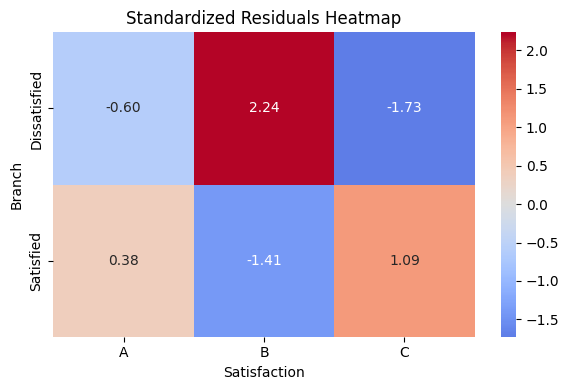

In [82]:
# Step 5: Visualize with Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Standardized Residuals Heatmap")
plt.ylabel("Branch")
plt.xlabel("Satisfaction")
plt.tight_layout()
plt.show()

### 🔍 Interpretation:

- **Standardized residuals** tell us how far the observed value is from expected, in standard deviation units.


- **Positive residuals** = more than expected  


- **Negative residuals** = less than expected  


- **|Residual| > 2** indicates **statistically significant deviation**.

## 📅 **[2025-03-27] – Q19**
**Implement a rolling chi-square test in streaming data.**

```python
# Simulate Kafka stream batches with columns: `Category`, `Clicked`
# Window: 1 hour, rolling
```

## 📅 **[2025-03-26] – Q20**
**Build custom Python function for chi-square test and Cramér’s V.**

```python
# Function input: Two pandas Series with categorical data
# Output: Chi-square value, p-value, Cramér’s V, and interpretation
```

# ANNOVA (one-way)

Here are **20 difficult and interview-relevant One-Way ANOVA (Analysis of Variance)** questions, suitable for **Data Scientist roles with 3–7 years of experience**. Each question includes the context and data required to solve it using Python (e.g., `scipy.stats.f_oneway`, `statsmodels`, or `pingouin`).

---

### **1. Product A/B/C Testing Across Regions**

Three versions of a product (A, B, C) were launched in three different regions. After one month, these are the average user satisfaction scores (scale: 1–10):

```python
product_A = [7.2, 6.8, 7.5, 6.9, 7.1]
product_B = [6.5, 6.7, 6.4, 6.9, 6.6]
product_C = [7.3, 7.5, 7.1, 7.6, 7.4]
```

**Question:** Is there a significant difference in user satisfaction across the three versions?

---

### **2. Campaign Effectiveness on Leads Generated**

You run 4 different marketing campaigns and measure leads generated:

```python
campaign_1 = [130, 125, 140, 135, 128]
campaign_2 = [115, 118, 120, 117, 119]
campaign_3 = [135, 140, 132, 137, 134]
campaign_4 = [122, 120, 125, 121, 124]
```

**Question:** Do all campaigns perform equally in terms of leads generated?

---

### **3. App Engagement Based on UI Themes**

You test three UI themes and measure average session durations (in minutes):

```python
theme_1 = [5.2, 5.8, 6.1, 5.9, 5.7]
theme_2 = [6.2, 6.3, 6.1, 6.0, 6.5]
theme_3 = [4.9, 5.0, 5.2, 5.1, 4.8]
```

**Question:** Is session duration significantly impacted by UI theme?

---

### **4. Customer Spend Across Membership Levels**

You record average monthly spend (in $) of customers across Silver, Gold, and Platinum tiers:

```python
silver = [230, 210, 215, 225, 240]
gold = [310, 315, 300, 320, 305]
platinum = [420, 430, 415, 410, 425]
```

**Question:** Does spending differ significantly by membership level?

---

### **5. Employee Productivity Across Shifts**

Productivity scores (out of 100) from employees working in three different shifts:

```python
morning = [82, 85, 84, 86, 83]
evening = [80, 78, 79, 81, 77]
night = [75, 74, 76, 73, 72]
```

**Question:** Is the shift affecting employee productivity?

---

### **6. Delivery Time Across Cities**

Delivery times (in hours) for the same logistics company in three cities:

```python
city_A = [12.1, 12.3, 11.8, 12.5, 12.0]
city_B = [13.2, 13.4, 13.1, 13.0, 13.3]
city_C = [11.7, 11.6, 11.9, 11.5, 11.8]
```

**Question:** Is there a significant difference in delivery time across cities?

---

### **7. Conversion Rate by Traffic Source**

You track conversion rate (%) across different traffic sources:

```python
organic = [3.5, 3.2, 3.3, 3.6, 3.4]
paid = [4.1, 4.2, 4.0, 4.3, 4.1]
referral = [3.0, 2.9, 3.1, 3.0, 3.2]
```

**Question:** Do conversion rates vary significantly by traffic source?

---

### **8. Temperature Control Across Factories**

Temperature readings from three factories:

```python
factory_1 = [22.5, 22.8, 23.0, 22.6, 22.7]
factory_2 = [23.1, 23.4, 23.2, 23.0, 23.3]
factory_3 = [22.0, 22.1, 22.3, 21.9, 22.2]
```

**Question:** Is temperature control consistent across factories?

---

### **9. Sales Across Branches**

Weekly sales ($) across 4 store branches:

```python
branch_1 = [8200, 8300, 8100, 8250, 8400]
branch_2 = [7950, 8000, 8100, 7980, 8050]
branch_3 = [8600, 8700, 8650, 8580, 8720]
branch_4 = [7800, 7750, 7700, 7820, 7780]
```

**Question:** Is there a significant difference in performance across branches?

---

### **10. Credit Score Change After Different Financial Programs**

Credit score improvements (in points) after enrolling in 3 financial improvement programs:

```python
program_1 = [25, 30, 28, 27, 26]
program_2 = [35, 36, 34, 33, 37]
program_3 = [20, 21, 19, 18, 22]
```

**Question:** Is there a difference in improvement between programs?

---

### **11. Error Rate in ML Models**

You compare the error rate (in %) of three models across 5 test runs:

```python
model_1 = [6.1, 6.3, 6.2, 6.0, 6.1]
model_2 = [5.5, 5.6, 5.7, 5.4, 5.5]
model_3 = [6.8, 6.7, 6.9, 6.6, 6.8]
```

**Question:** Is the error rate significantly different among models?

---

### **12. Investment Return Based on Risk Profile**

Return % of portfolios classified as low-risk, medium-risk, and high-risk:

```python
low = [4.2, 4.0, 4.3, 4.1, 4.2]
medium = [6.1, 6.0, 6.2, 5.9, 6.1]
high = [9.0, 8.8, 9.1, 8.9, 9.0]
```

**Question:** Does investment risk profile significantly affect returns?

---

### **13. Student Test Scores Based on Learning Platform**

Scores from students using three platforms:

```python
platform_1 = [88, 85, 87, 86, 89]
platform_2 = [91, 92, 90, 93, 91]
platform_3 = [82, 80, 83, 81, 84]
```

**Question:** Which platform contributes significantly to better test scores?

---

### **14. Average Processing Time by Team**

Three teams handle support tickets. Their average processing times:

```python
team_A = [45, 48, 47, 46, 44]
team_B = [50, 52, 49, 51, 53]
team_C = [42, 43, 41, 40, 44]
```

**Question:** Does team assignment significantly impact processing time?

---

### **15. CPU Usage Across Software Versions**

Average CPU usage across software versions:

```python
version_1 = [62, 60, 61, 63, 59]
version_2 = [67, 68, 69, 66, 67]
version_3 = [55, 56, 54, 57, 55]
```

**Question:** Are CPU usages significantly different across versions?

---

### **16. User Retention Across Feature Flags**

You track 7-day retention rates across 3 feature flags:

```python
feature_A = [45.2, 46.1, 44.9, 45.5, 46.0]
feature_B = [47.8, 48.2, 47.5, 47.9, 48.0]
feature_C = [43.0, 43.5, 42.9, 43.1, 43.3]
```

**Question:** Which feature setting improves retention?

---

### **17. Mobile App Ratings by Platform**

User ratings for iOS, Android, and Web app versions:

```python
ios = [4.5, 4.4, 4.6, 4.5, 4.5]
android = [4.3, 4.2, 4.1, 4.3, 4.2]
web = [4.6, 4.7, 4.5, 4.6, 4.8]
```

**Question:** Is there a platform-based difference in ratings?

---

### **18. Response Time After AI Integration**

Average response time (in ms) from three different chatbot versions:

```python
v1 = [220, 230, 225, 222, 228]
v2 = [210, 212, 209, 211, 208]
v3 = [240, 245, 238, 242, 239]
```

**Question:** Has the AI chatbot significantly improved response time?

---

### **19. Salary Increment Post Training by Department**

Post-training salary increments across departments:

```python
dept_A = [500, 520, 510, 530, 515]
dept_B = [450, 460, 455, 470, 465]
dept_C = [480, 490, 485, 475, 488]
```

**Question:** Are training impacts on salary equal across departments?

---

### **20. Noise Levels Across Offices**

You measured noise levels in decibels across office areas:

```python
area_1 = [60, 62, 61, 59, 60]
area_2 = [65, 64, 66, 65, 63]
area_3 = [58, 59, 57, 58, 60]
```

**Question:** Do different office areas significantly vary in noise level?

---

Would you like Python boilerplate code to solve one or two examples using `scipy.stats.f_oneway` or `statsmodels`?

Here's a clean and reusable **Python code template for One-Way ANOVA**, suitable for solving real-world problems and common **data science interview questions** (3–7 years experience level).

---

### ✅ Python Code Template: One-Way ANOVA

```python
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare Your Data (Replace with your real dataset)
data = {
    'Group': ['A'] * 5 + ['B'] * 5 + ['C'] * 5,
    'Score': [85, 87, 90, 88, 86, 78, 82, 84, 79, 80, 92, 95, 94, 93, 96]
}
df = pd.DataFrame(data)

# Step 2: Visualize the data
sns.boxplot(x='Group', y='Score', data=df)
plt.title('Score Distribution by Group')
plt.show()

# Step 3: Prepare the data for ANOVA
grouped_data = [df[df['Group'] == grp]['Score'] for grp in df['Group'].unique()]

# Step 4: Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

print("F-statistic:", f_stat)
print("p-value:", p_value)

# Step 5: Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among group means.")
```

---

### 🧠 Notes

- `stats.f_oneway(*groups)` is used for classical **one-way ANOVA** where:
  - Each group is independent.
  - Residuals are normally distributed.
  - Variance is assumed to be equal (can be checked separately).
- You can add **Tukey's HSD test** for post-hoc analysis if the result is significant.

---

### 🔍 Optional: Tukey’s Post Hoc Test

```python
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Score'], groups=df['Group'], alpha=0.05)
print(tukey)
tukey.plot_simultaneous()
plt.show()
```

---

Let me know if you want:
- A version with **Levene’s test** (for checking equal variances)
- An example using **real-life datasets** (e.g., tips, iris, employee performance)
- Or the same template wrapped as a **function or notebook**

Happy to help build out your ANOVA interview prep!

Absolutely! Here's your enhanced **One-Way ANOVA template in Python** with **Levene’s test** included to check for **homogeneity of variances**—a critical assumption for standard ANOVA.

---

### ✅ Python Code Template: One-Way ANOVA with Levene's Test

```python
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Sample Data (Replace this with your real data)
data = {
    'Group': ['A'] * 5 + ['B'] * 5 + ['C'] * 5,
    'Score': [85, 87, 90, 88, 86, 78, 82, 84, 79, 80, 92, 95, 94, 93, 96]
}
df = pd.DataFrame(data)

# Step 2: Visualize Group Distributions
sns.boxplot(x='Group', y='Score', data=df)
plt.title('Score Distribution by Group')
plt.show()

# Step 3: Prepare data by group
groups = df['Group'].unique()
grouped_data = [df[df['Group'] == group]['Score'] for group in groups]

# Step 4: Levene’s Test for Equal Variance
levene_stat, levene_p = stats.levene(*grouped_data)
print("Levene’s Test:")
print("Statistic:", levene_stat)
print("p-value:", levene_p)

# Step 5: One-Way ANOVA
print("\nOne-Way ANOVA:")
if levene_p > 0.05:
    print("Variances are equal (p > 0.05). Proceed with standard ANOVA.")
else:
    print("Warning: Variances may not be equal (p < 0.05). Consider Welch’s ANOVA.")

f_stat, p_value = stats.f_oneway(*grouped_data)
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Step 6: Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: At least one group mean is significantly different.")
    
    # Optional: Post-Hoc Test if ANOVA is significant
    print("\nTukey's HSD Post Hoc Test:")
    tukey = pairwise_tukeyhsd(endog=df['Score'], groups=df['Group'], alpha=alpha)
    print(tukey)
    tukey.plot_simultaneous()
    plt.show()
else:
    print("Fail to reject null hypothesis: No significant difference among group means.")
```

---

### 🧠 Key Points for Interviews

- **Levene's test** checks for **equal variance** (homoscedasticity), required for ANOVA.
- If Levene’s p-value < 0.05, variances are **unequal** → suggest using **Welch’s ANOVA** (`statsmodels`).
- You should mention this diagnostic check in interviews to show statistical maturity.

---

Let me know if you'd like the **Welch’s ANOVA version** too (which handles unequal variances), or if you want to turn this into a reusable function/class for your portfolio.

# ANNOVA (two-way)

Here are **20 difficult Two-Way ANOVA** questions tailored for **data scientist interviews (3–7 years experience)**. These questions require **Python implementation** and are designed to assess your understanding of **interaction effects**, **main effects**, **assumptions testing**, and **interpretation** of Two-Way ANOVA results.

---

### ✅ DATASETS NOTE:

Each question either comes with synthetic data or a sample that can be created using Python. Use `pandas`, `statsmodels`, `scipy`, and `seaborn/matplotlib` for analysis.

---

## 🔬 Two-Way ANOVA — Interview-Level Questions

---

### **Q1. Productivity by Department and Experience**
You are given the following dataset of employee productivity scores:

| Employee_ID | Department | Experience_Level | Productivity_Score |
|-------------|------------|------------------|---------------------|
| E001        | Sales      | Junior           | 65                  |
| E002        | Sales      | Senior           | 82                  |
| E003        | HR         | Junior           | 58                  |
| E004        | HR         | Senior           | 75                  |
| ...         | ...        | ...              | ...                 |

**Question:**  
Perform a Two-Way ANOVA to test whether **Department**, **Experience_Level**, or their interaction significantly affects **Productivity_Score**.

---

### **Q2. Marketing Campaign Effectiveness**
You run an experiment with 3 **ad types** (Video, Banner, Text) across 2 **regions** (Urban, Rural).

**Data:**
Create synthetic data with `n=15` per group, assuming the dependent variable is **Conversion Rate**.

**Question:**  
Does ad type, region, or their interaction affect conversion rate?

---

### **Q3. Drug Efficacy Test**
A pharmaceutical company tests **3 drugs** (A, B, C) on patients across **2 age groups** (Below 50, Above 50). The dependent variable is **recovery days**.

**Question:**  
Use Two-Way ANOVA to determine whether **drug type**, **age group**, or their interaction affects recovery time.

---

### **Q4. Student Performance by Teaching Method and Gender**
Dataset contains:

- Teaching_Method: ['Traditional', 'Online', 'Hybrid']
- Gender: ['Male', 'Female']
- Test_Score: float values

**Question:**  
Is there a significant interaction between **teaching method** and **gender** on **student performance**?

---

### **Q5. Website Engagement Metrics**
You test two factors:  
- **UI Theme**: Light, Dark  
- **Device Type**: Desktop, Mobile  

**Dependent variable**: Avg Session Duration (in seconds)

**Question:**  
Run a Two-Way ANOVA and check if there's a significant interaction between UI theme and device type.

---

### **Q6. Manufacturing Defects**
Two factories (Factory A, Factory B) use three **machines** each (M1, M2, M3). You measure **number of defective items** over multiple shifts.

**Question:**  
Does factory, machine type, or their interaction affect the number of defects?

---

### **Q7. Call Center Analysis**
A telecom company records:
- **Shift**: Morning, Evening  
- **Language**: English, Spanish  
- **Call Duration** (in mins)

**Question:**  
Is there a statistically significant difference in call duration based on shift and language? What about their interaction?

---

### **Q8. Customer Ratings in Retail**
You're analyzing customer ratings based on:
- **Store Type**: Online, Offline  
- **Discount_Level**: High, Medium, Low  
- **Customer Rating (out of 10)**

**Question:**  
Use Two-Way ANOVA to test the main and interaction effects.

---

### **Q9. Battery Performance**
Battery tested across:
- **Temperature**: Low, Normal, High  
- **Brand**: X, Y  

**Metric:** Battery Life (in hours)

**Question:**  
Do temperature and brand affect battery performance independently or interactively?

---

### **Q10. Employee Stress**
Measure stress levels (0–100 scale) for:
- **Workload**: Low, Medium, High  
- **Work Mode**: Remote, In-office

**Question:**  
Is there a significant interaction effect between workload and work mode on stress?

---

### **Q11. Hotel Reviews Analysis**
Guests provide ratings across:
- **Booking Source**: Website, App  
- **Stay Length**: Short, Long  
- **Satisfaction Score** (0–100)

**Question:**  
Is guest satisfaction influenced by booking source, stay length, or their interaction?

---

### **Q12. E-commerce Return Rates**
Dataset:
- **Item Category**: Electronics, Clothing  
- **Shipping Speed**: Standard, Express  
- **Return Rate**: %

**Question:**  
Conduct a Two-Way ANOVA and interpret results.

---

### **Q13. Online Learning Engagement**
Factors:
- **Learning Format**: Recorded, Live  
- **Course Type**: Technical, Non-Technical  
- **Engagement Score**

**Question:**  
Is there an interaction effect between learning format and course type on engagement?

---

### **Q14. Airline Delay**
You analyze delays based on:
- **Airline**: A, B, C  
- **Time of Day**: Morning, Evening  
- **Delay (minutes)**

**Question:**  
Do airline and time affect delays? Is the interaction significant?

---

### **Q15. Retail Footfall**
Data:
- **Season**: Summer, Winter  
- **Ad Campaign**: Facebook, TV  
- **Footfall Count**

**Question:**  
Use Two-Way ANOVA to test interaction and main effects.

---

### **Q16. Sales Training Programs**
A company implements:
- **Training Type**: A, B  
- **Experience Level**: Junior, Senior  
- **Sales Revenue**

**Question:**  
Does training type impact revenue differently for different experience levels?

---

### **Q17. Movie Ratings**
Users rated movies based on:
- **Genre**: Action, Comedy  
- **Platform**: Mobile, Desktop  
- **Rating (0–10)**

**Question:**  
Run a Two-Way ANOVA to understand interaction between genre and platform.

---

### **Q18. Fitness Program Study**
Variables:
- **Diet Plan**: Keto, Low-Carb, Vegan  
- **Exercise Routine**: Cardio, Strength  
- **Weight Loss (kg)**

**Question:**  
Is weight loss impacted more by diet, exercise, or their combination?

---

### **Q19. Insurance Claims Fraud Detection**
You analyze:
- **Policy Type**: Health, Vehicle  
- **Claim Channel**: Online, Agent  
- **Fraud Score (0–1)**

**Question:**  
Is there a significant interaction between policy type and claim channel?

---

### **Q20. Bank Loan Approval Times**
Dataset:
- **Branch Location**: Urban, Suburban, Rural  
- **Loan Type**: Home, Auto  
- **Approval Time (days)**

**Question:**  
Analyze using Two-Way ANOVA to identify interaction and main effects.

---

Let me know if you'd like the **code templates**, **sample synthetic data**, or **detailed solutions** for these questions.

Here's a **Python code template** for solving any **Two-Way ANOVA** problem using `statsmodels`. This can be adapted for any of the 20 interview questions I gave earlier.

---

### ✅ Python Code Template for Two-Way ANOVA

```python
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Simulated Data (Replace with your own data)
data = {
    'FactorA': ['A1', 'A1', 'A1', 'A2', 'A2', 'A2', 'A3', 'A3', 'A3'] * 2,
    'FactorB': ['B1'] * 9 + ['B2'] * 9,
    'Response': [12, 14, 13, 18, 20, 19, 25, 27, 26, 15, 16, 14, 21, 22, 20, 28, 30, 29]
}
df = pd.DataFrame(data)

# Check the first few rows
print(df.head())

# Optional: Plot the interaction
sns.pointplot(x='FactorA', y='Response', hue='FactorB', data=df, dodge=True, markers=['o', 's'], capsize=.1)
plt.title('Interaction Plot')
plt.show()

# Run Two-Way ANOVA (with interaction)
model = ols('Response ~ C(FactorA) + C(FactorB) + C(FactorA):C(FactorB)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # type 2 for balanced design
print(anova_table)

# Optional: Check model assumptions
residuals = model.resid
fitted = model.fittedvalues

# Residual plot
sns.residplot(x=fitted, y=residuals, lowess=True)
plt.axhline(0, linestyle='--')
plt.title("Residuals vs Fitted")
plt.show()

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()
```

---

### 🧠 Key Customization Points

- Change `'FactorA'`, `'FactorB'`, and `'Response'` to match your dataset.
- Use `ols('Response ~ C(FactorA) + C(FactorB) + C(FactorA):C(FactorB)', ...)` for interaction.
- Use `typ=2` or `typ=3` depending on whether the design is **balanced or unbalanced**.
- Plot interaction effects to visualize **crossed lines (interaction)**.

---

Let me know if you want:
- A version with **p-value interpretation**
- A reusable **function template**
- A notebook with multiple examples
- Help generating synthetic datasets for practice

I'm happy to customize it based on your next move!